In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Import Data**

In [ ]:
score_20 = pd.read_csv("/content/diemthi2020.csv")
score_21 = pd.read_csv("/content/diemthi2021.csv")
score_22 = pd.read_csv("/content/diemthi2022.csv")

#**New Code Version**

##**2. Điểm Tự nhiên khó lấy điểm cao hơn điểm Xã hội** (confidence interval and histogram)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sci_features_20 = score_20[['Biological','Physics','Chemistry','Math','Foreign Language','Literature','GPA of Natural Science']]
sci_features_20.dropna(inplace = True)
# print(sci_features_20.isna().sum(),sci_features_20)
soc_features_20 = score_20[['Civic Education','Geography','History','Math','Foreign Language','Literature','GPA of Natural Social']]
soc_features_20.dropna(inplace = True)
# print(soc_features_20.isna().sum(),soc_features_20)
sci_features_21 = score_21[['Biological','Physics','Chemistry','Math','Foreign Language','Literature','GPA of Natural Science']]
sci_features_21.dropna(inplace = True)
# print(sci_features_21.isna().sum(),sci_features_21)
soc_features_21 = score_21[['Civic Education','Geography','History','Math','Foreign Language','Literature','GPA of Natural Social']]
soc_features_21.dropna(inplace = True)
# print(soc_features_21.isna().sum(),soc_features_21)
sci_features_22 = score_22[['Biological','Physical','Chemistry','Math','Foreign Language','Literature','GPA of Natural Science']]
sci_features_22.dropna(inplace = True)
# print(sci_features_22.isna().sum(),sci_features_22)
soc_features_22 = score_22[['Civic education','GeographyCivic education','History','Math','Foreign Language','Literature','GPA of Social Science']]
soc_features_22.dropna(inplace = True)
# print(soc_features_22.isna().sum(),soc_features_22)

###**Confidence Interval**

In [ ]:
import math

def calculate_confidence_interval(sample_mean, population_std_dev, population, confidence_level=0.95):
    # Assuming large sample sizes, n is approximately equal to the population size
    n = population
    # Using z-distribution critical value for the desired confidence level
    z_critical = 1.96  # For 95% confidence level (can change for different confidence levels)
    # Calculating standard error
    standard_error = population_std_dev / math.sqrt(n)
    # Calculating lower and upper bounds of the confidence interval
    lower_bound = sample_mean - (z_critical * standard_error)
    upper_bound = sample_mean + (z_critical * standard_error)
    return (lower_bound, upper_bound)

In [ ]:
data = {
    2020: {
        'NS_mean': score_20['GPA of Natural Science'].mean(),
        'NS_standard deviation':  score_20['GPA of Natural Science'].std(),
        'NS_variance':  score_20['GPA of Natural Science'].var(),
        'NS_population':  score_20['GPA of Natural Science'].count(),
        'SS_mean': score_20['GPA of Natural Social'].mean(),
        'SS_standard deviation': score_20['GPA of Natural Social'].std(),
        'SS_variance': score_20['GPA of Natural Social'].var(),
        'SS_population': score_20['GPA of Natural Social'].count()
    },
    2021: {
        'NS_mean': score_21['GPA of Natural Science'].mean(),
        'NS_standard deviation':  score_21['GPA of Natural Science'].std(),
        'NS_variance':  score_21['GPA of Natural Science'].var(),
        'NS_population':  score_21['GPA of Natural Science'].count(),
        'SS_mean': score_21['GPA of Natural Social'].mean(),
        'SS_standard deviation': score_21['GPA of Natural Social'].std(),
        'SS_variance': score_21['GPA of Natural Social'].var(),
        'SS_population': score_21['GPA of Natural Social'].count()
    },
    2022: {
        'NS_mean': score_22['GPA of Natural Science'].mean(),
        'NS_standard deviation':  score_22['GPA of Natural Science'].std(),
        'NS_variance':  score_22['GPA of Natural Science'].var(),
        'NS_population':  score_22['GPA of Natural Science'].count(),
        'SS_mean': score_22['GPA of Social Science'].mean(),
        'SS_standard deviation': score_22['GPA of Social Science'].std(),
        'SS_variance': score_22['GPA of Social Science'].var(),
        'SS_population': score_22['GPA of Social Science'].count()
    }
}
# Calculate confidence intervals for GPA of Natural Sciences and Social Sciences for each year
for year, values in data.items():
    NS_lower, NS_upper = calculate_confidence_interval(values['NS_mean'], values['NS_standard deviation'], values['NS_population'])
    SS_lower, SS_upper = calculate_confidence_interval(values['SS_mean'], values['SS_standard deviation'], values['SS_population'])

    print(f"Year {year} - GPA of Natural Sciences: {NS_lower:.3f} to {NS_upper:.3f}")
    print(f"Year {year} - GPA of Social Sciences: {SS_lower:.3f} to {SS_upper:.3f}")

Year 2020 - GPA of Natural Sciences: 6.336 to 6.345
Year 2020 - GPA of Social Sciences: 6.547 to 6.554
Year 2021 - GPA of Natural Sciences: 6.252 to 6.261
Year 2021 - GPA of Social Sciences: 6.592 to 6.600
Year 2022 - GPA of Natural Sciences: 6.208 to 6.217
Year 2022 - GPA of Social Sciences: 6.908 to 6.915


###**2 sample variance hypothesis test**

In [ ]:
import numpy as np
from scipy.stats import f

def two_sample_variance_test(sample1, sample2, alpha=0.05):
    # Calculate the sample variances
    variance1 = np.var(sample1, ddof=1)  # Set ddof=1 for sample variance (N-1)
    variance2 = np.var(sample2, ddof=1)

    # Calculate the F-statistic
    F_statistic = variance1 / variance2 if variance1 >= variance2 else variance2 / variance1

    # Calculate the degrees of freedom
    df1 = len(sample1) - 1
    df2 = len(sample2) - 1

    # Calculate the critical F-value
    critical_F = f.ppf(1 - alpha / 2, df1, df2)

    # Compare the F-statistic with the critical F-value to make a decision on the null hypothesis
    if F_statistic > critical_F:
        # Reject the null hypothesis (Ha: Variances are different)
        return "Reject null hypothesis: \nThere is evidence to suggest that the population variance in scores of Natural Science is greater than the population variance in scores of Social Science."
    else:
        # Fail to reject the null hypothesis (H0: Variances are equal)
        return "Fail to reject null hypothesis: \nThere is no evidence to suggest that the population variance in scores of Natural Science is greater than the population variance in scores of Social Science."

# Example usage for each year's data
sample1_2020 = score_20['GPA of Natural Science'].dropna()
sample2_2020 = score_20['GPA of Natural Social'].dropna()


result_2020 = two_sample_variance_test(sample1_2020, sample2_2020)
print("2020:", result_2020)

sample1_2021 = score_21['GPA of Natural Science'].dropna()
sample2_2021 = score_21['GPA of Natural Social'].dropna()

result_2021 = two_sample_variance_test(sample1_2021, sample2_2021)
print("2021:", result_2021)

sample_data_2022 = score_22[['GPA of Natural Science', 'GPA of Social Science']].dropna()
sample1_2022 = score_22['GPA of Natural Science'].dropna()
sample2_2022 = score_22['GPA of Social Science'].dropna()

result_2022 = two_sample_variance_test(sample1_2022, sample2_2022)
print("2022:", result_2022)

2020: Reject null hypothesis: 
There is evidence to suggest that the population variance in scores of Natural Science is greater than the population variance in scores of Social Science.
2021: Reject null hypothesis: 
There is evidence to suggest that the population variance in scores of Natural Science is greater than the population variance in scores of Social Science.
2022: Reject null hypothesis: 
There is evidence to suggest that the population variance in scores of Natural Science is greater than the population variance in scores of Social Science.


###**Histogram**

####**2020**

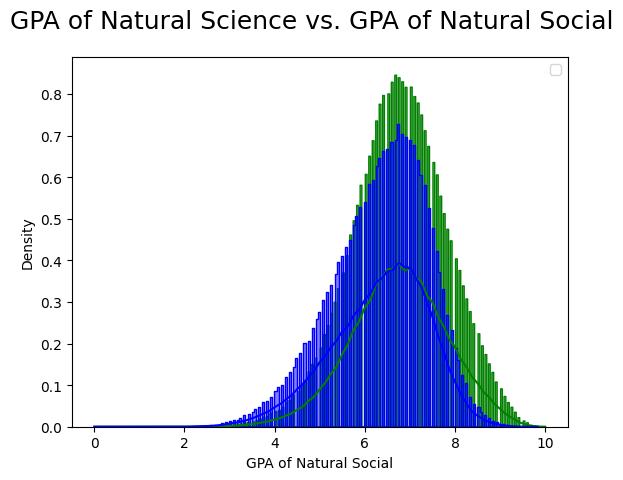

In [ ]:
def plot_combined_histograms(score_natural, score_social):
    sns.histplot(x=score_social, data=soc_features_20, kde=True, element="step", stat="density", color='green')

    # Natural Science Histogram
    sns.histplot(x=score_natural, data=sci_features_20, kde=True, element="step", stat="density", color='blue')

    # Social Science Histogram

    plt.suptitle("GPA of Natural Science vs. GPA of Natural Social", fontsize=18)
    plt.legend()
    plt.show()

plot_combined_histograms('GPA of Natural Science', 'GPA of Natural Social')


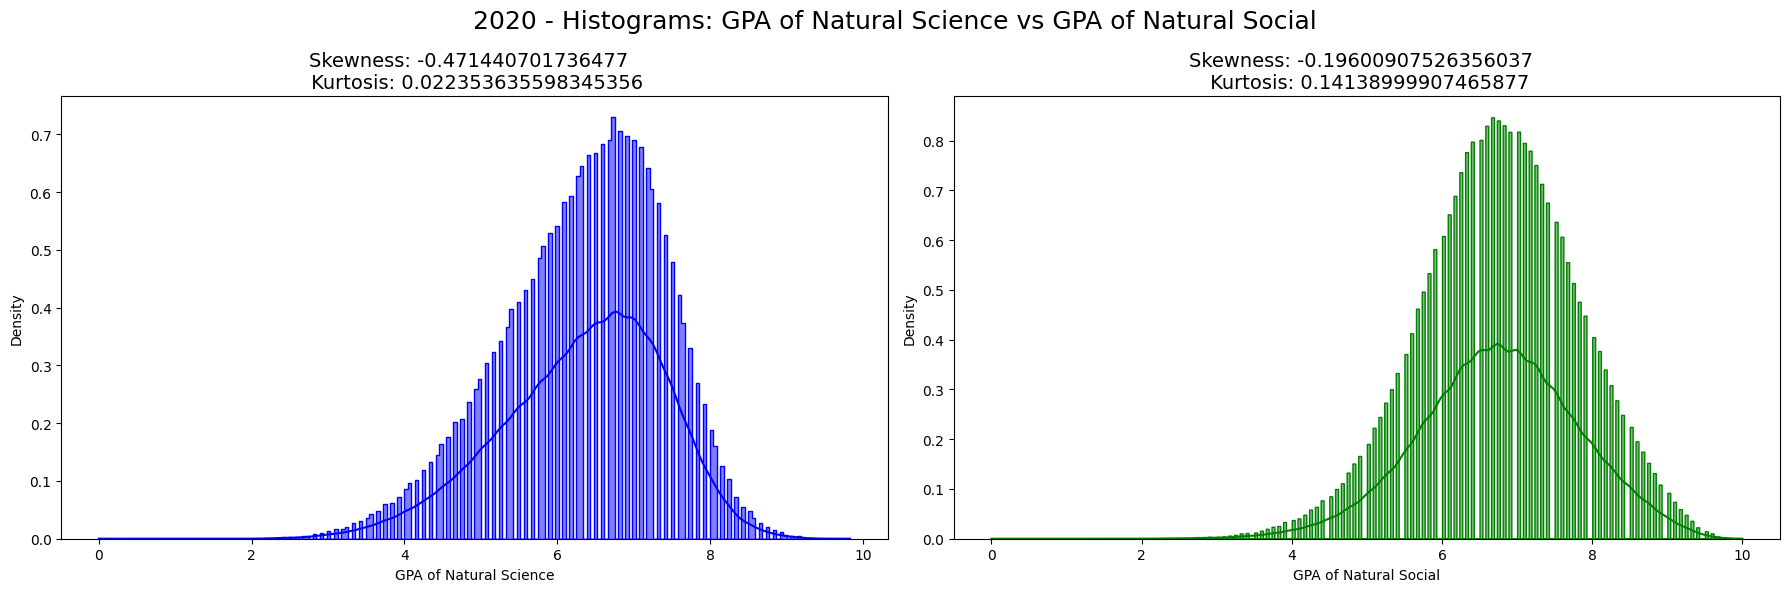

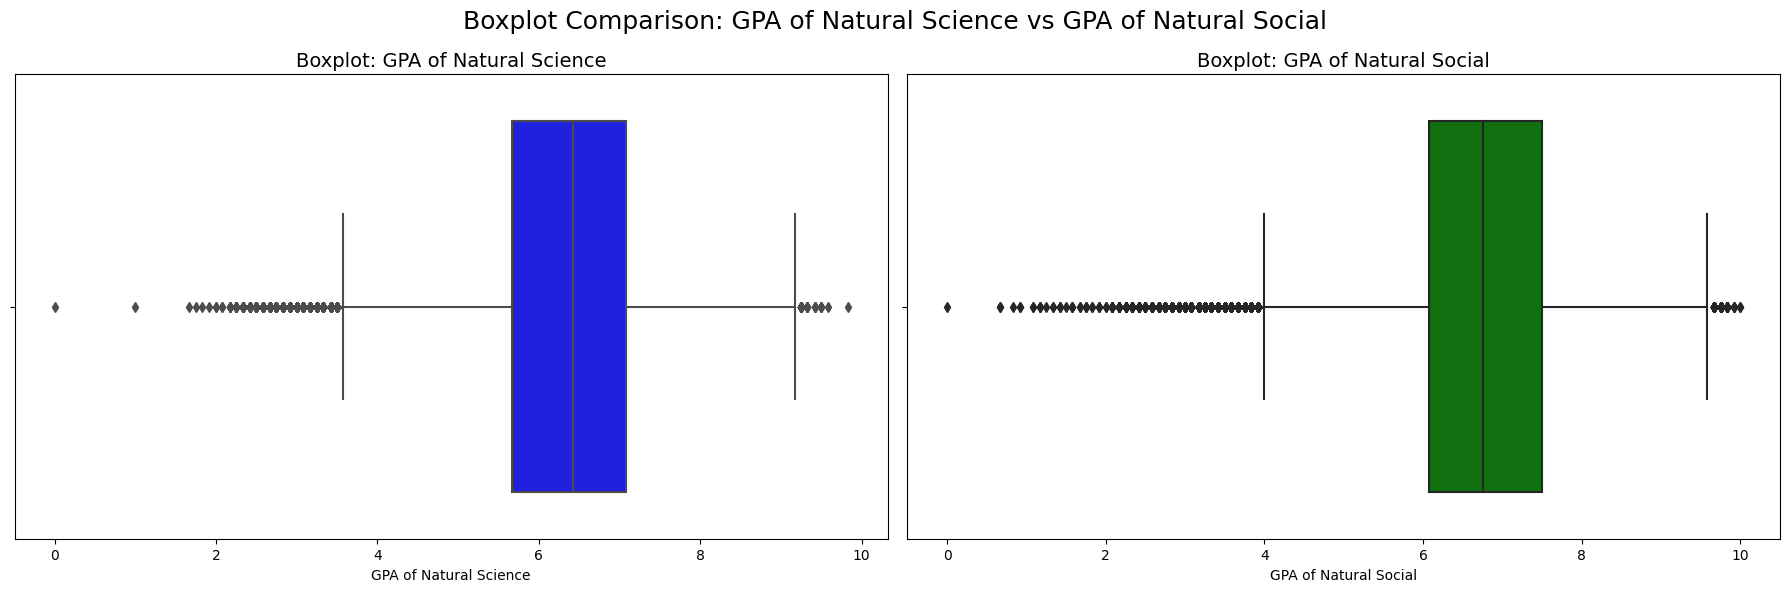

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot histogram for Natural Science
    sns.histplot(x=score1, data=data1, kde=True, element="step", stat="density", color=color1, ax=axes[0])
    axes[0].set_title(f"Skewness: {data1[score1].skew()}  \n Kurtosis: {data1[score1].kurt()}", fontsize=14)

    # Plot histogram for Social Science
    sns.histplot(x=score2, data=data2, kde=True, element="step", stat="density", color=color2, ax=axes[1])
    axes[1].set_title(f"Skewness: {data2[score2].skew()}  \n Kurtosis: {data2[score2].kurt()}", fontsize=14)

    plt.suptitle(f"2020 - Histograms: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

def plot_boxplot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot boxplot for Natural Science
    sns.boxplot(x=score1, data=data1, ax=axes[0], color=color1)
    axes[0].set_title(f"Boxplot: {score1}", fontsize=14)

    # Plot boxplot for Social Science
    sns.boxplot(x=score2, data=data2, ax=axes[1], color=color2)
    axes[1].set_title(f"Boxplot: {score2}", fontsize=14)

    plt.suptitle(f"Boxplot Comparison: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

# Assuming you have the dataframes sci_features_20 and soc_features_20 for each score
score1 = 'GPA of Natural Science'
score2 = 'GPA of Natural Social'
color1 = 'blue'
color2 = 'green'

plot_combined(score1, score2, sci_features_20, soc_features_20, color1, color2)
plot_boxplot_combined(score1, score2, sci_features_20, soc_features_20, color1, color2)


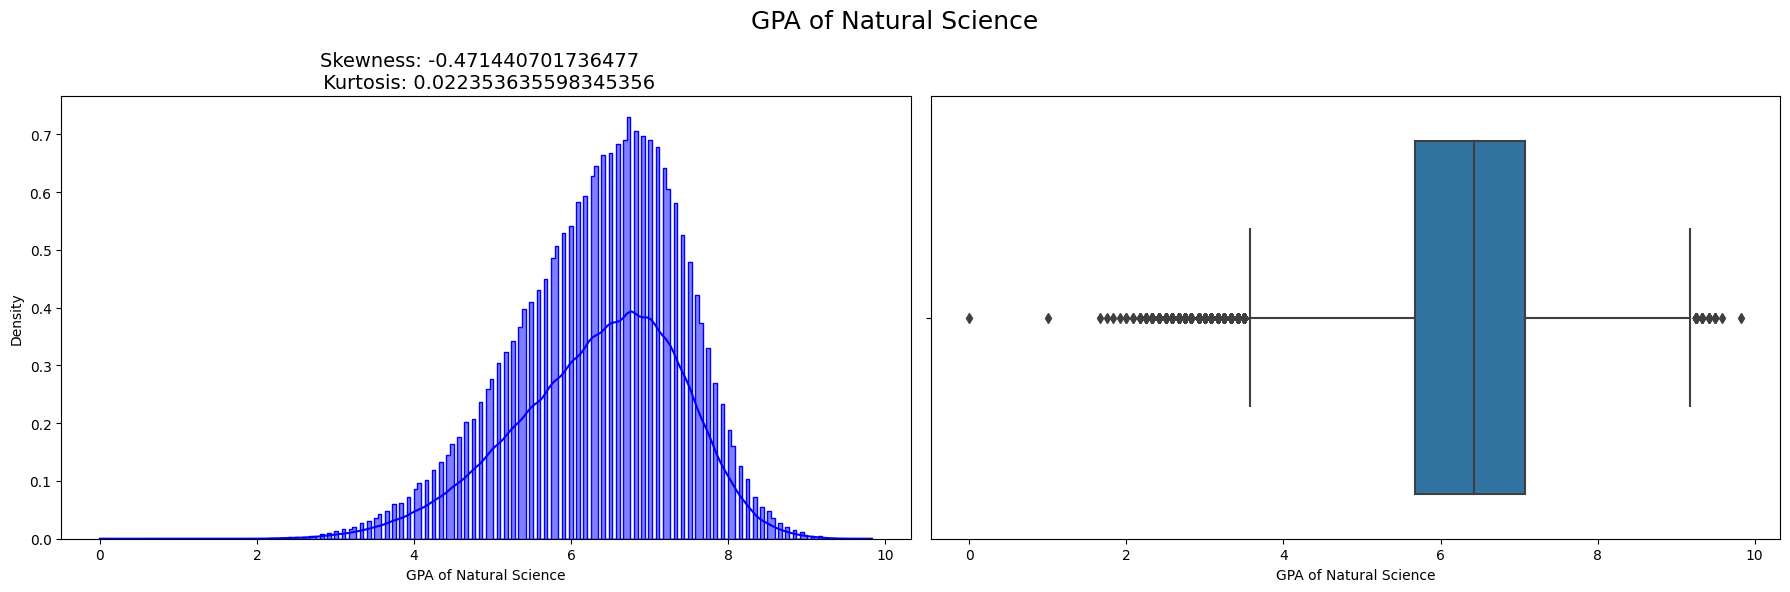

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=sci_features_20, kde=True, element="step", stat="density",color = 'blue', ax=ax[0])

    sns.boxplot(x=score, data=sci_features_20,  ax=ax[1])
    ax[0].set_title(f"Skewness: {sci_features_20[score].skew()}  \n Kurtosis: {sci_features_20[score].kurt()}", fontsize=14, )
    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()

plot('GPA of Natural Science')


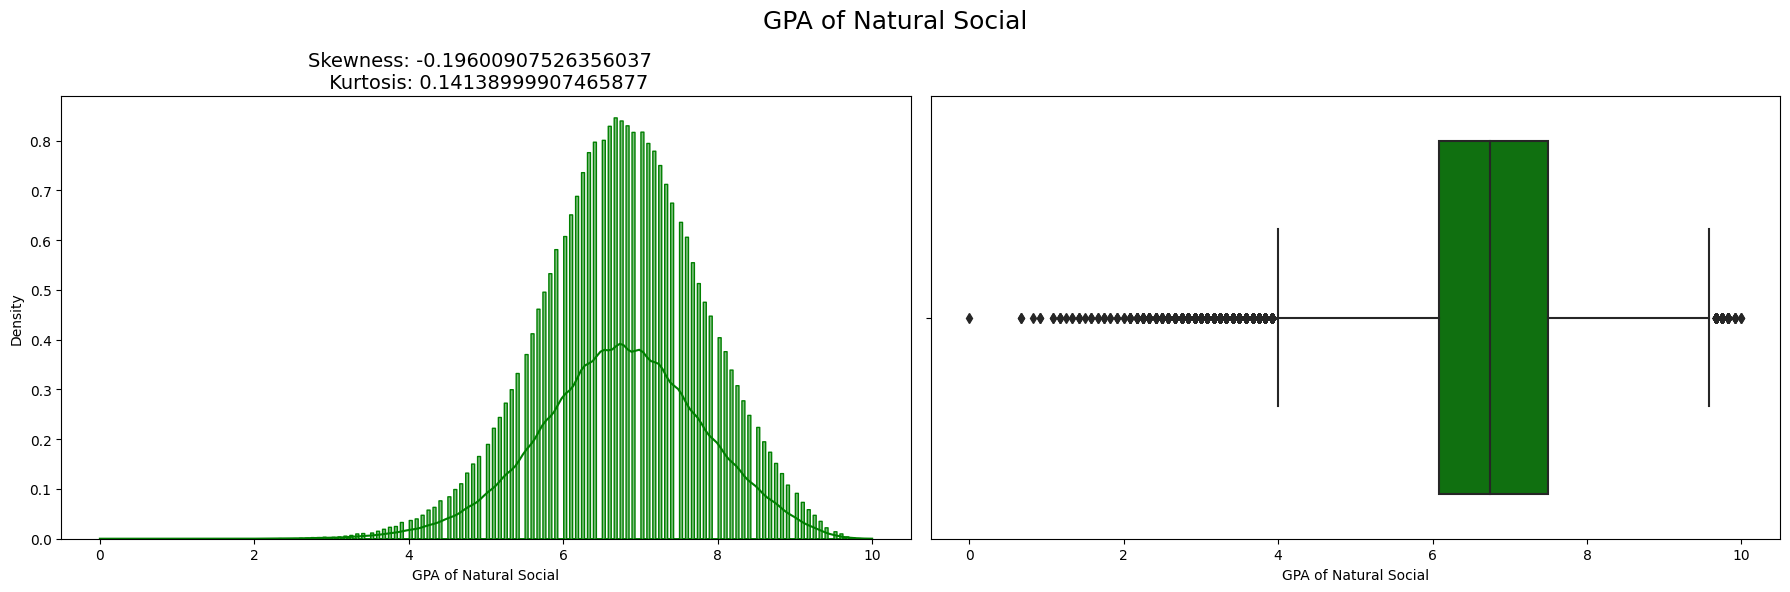

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=soc_features_20, kde=True, element="step", stat="density",color = 'green', ax=ax[0])

    sns.boxplot(x=score, data=soc_features_20,  ax=ax[1], color='g')
    ax[0].set_title(f"Skewness: {soc_features_20[score].skew()}  \n Kurtosis: {soc_features_20[score].kurt()}", fontsize=14, )

    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()
plot('GPA of Natural Social')

####**2021**

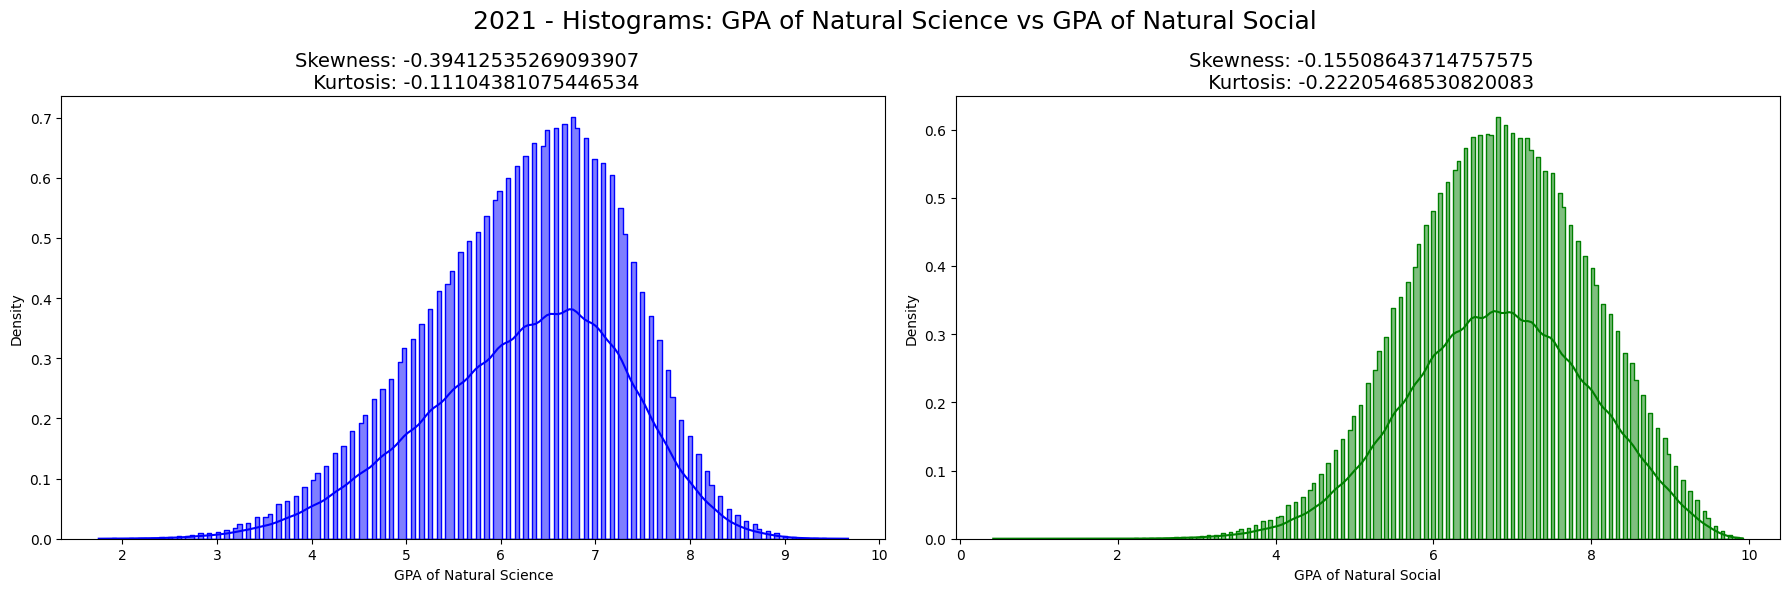

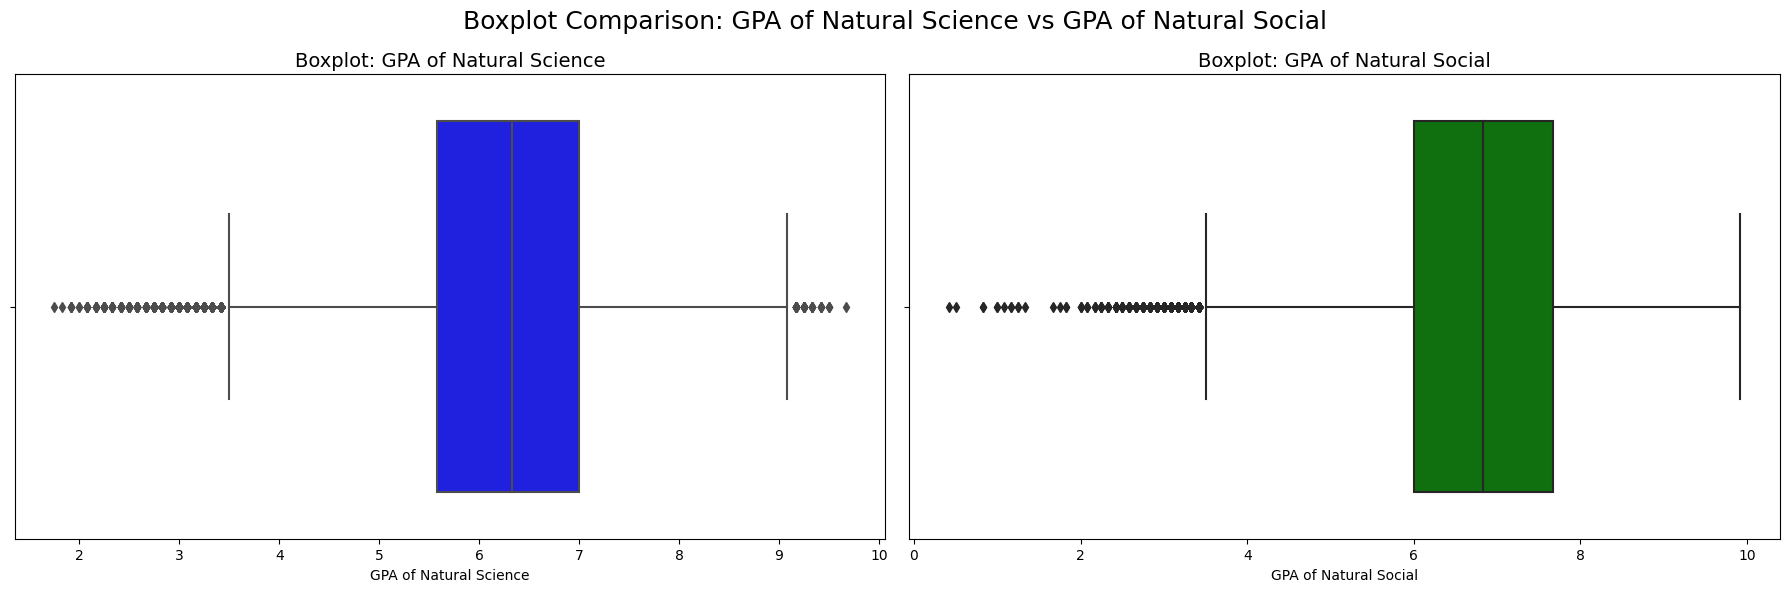

In [ ]:
def plot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot histogram for Natural Science
    sns.histplot(x=score1, data=data1, kde=True, element="step", stat="density", color=color1, ax=axes[0])
    axes[0].set_title(f"Skewness: {data1[score1].skew()}  \n Kurtosis: {data1[score1].kurt()}", fontsize=14)

    # Plot histogram for Social Science
    sns.histplot(x=score2, data=data2, kde=True, element="step", stat="density", color=color2, ax=axes[1])
    axes[1].set_title(f"Skewness: {data2[score2].skew()}  \n Kurtosis: {data2[score2].kurt()}", fontsize=14)

    plt.suptitle(f"2021 - Histograms: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

def plot_boxplot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot boxplot for Natural Science
    sns.boxplot(x=score1, data=data1, ax=axes[0], color=color1)
    axes[0].set_title(f"Boxplot: {score1}", fontsize=14)

    # Plot boxplot for Social Science
    sns.boxplot(x=score2, data=data2, ax=axes[1], color=color2)
    axes[1].set_title(f"Boxplot: {score2}", fontsize=14)

    plt.suptitle(f"Boxplot Comparison: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

# Assuming you have the dataframes sci_features_20 and soc_features_20 for each score
score1 = 'GPA of Natural Science'
score2 = 'GPA of Natural Social'
color1 = 'blue'
color2 = 'green'

plot_combined(score1, score2, sci_features_21, soc_features_21, color1, color2)
plot_boxplot_combined(score1, score2, sci_features_21, soc_features_21, color1, color2)

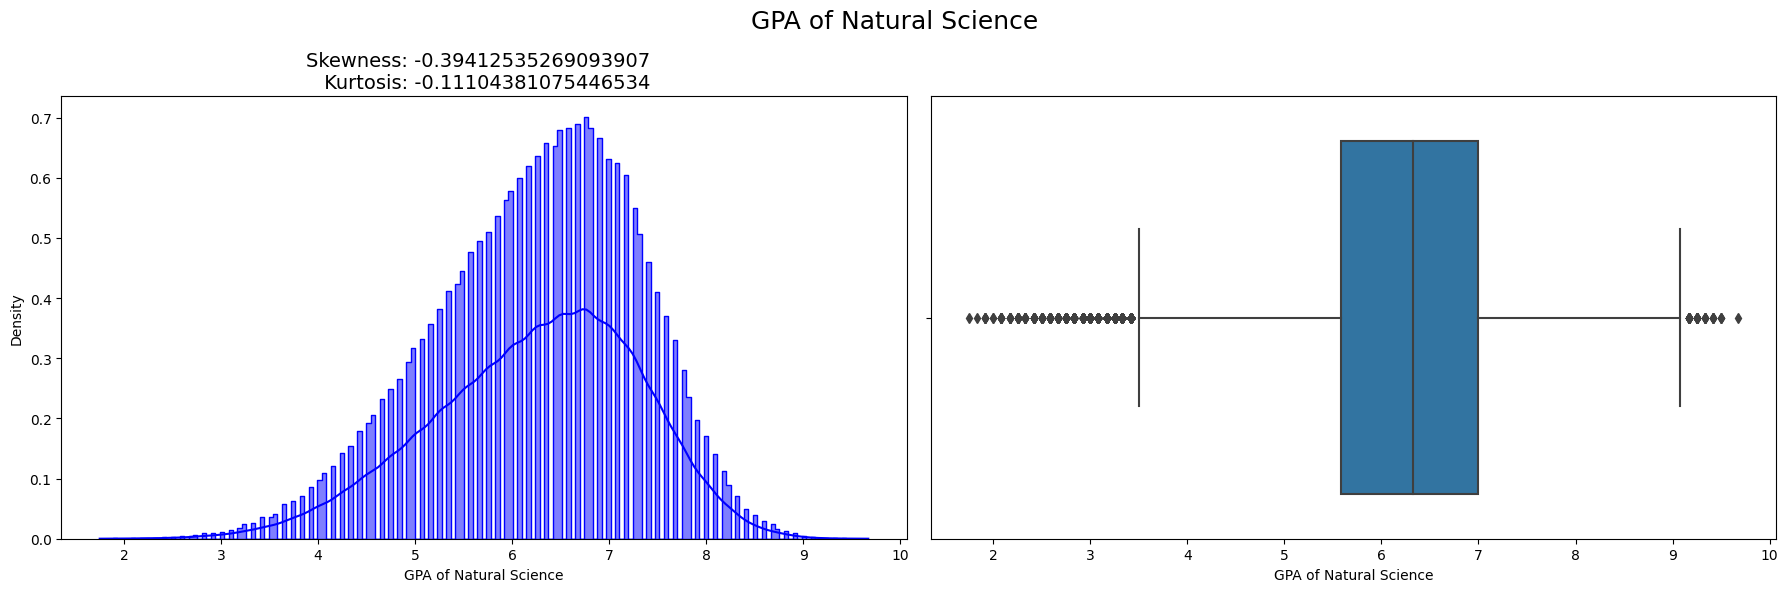

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=sci_features_21, kde=True, element="step", stat="density",color = 'blue', ax=ax[0])

    sns.boxplot(x=score, data=sci_features_21,  ax=ax[1])
    ax[0].set_title(f"Skewness: {sci_features_21[score].skew()}  \n Kurtosis: {sci_features_21[score].kurt()}", fontsize=14, )
    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()

plot('GPA of Natural Science')


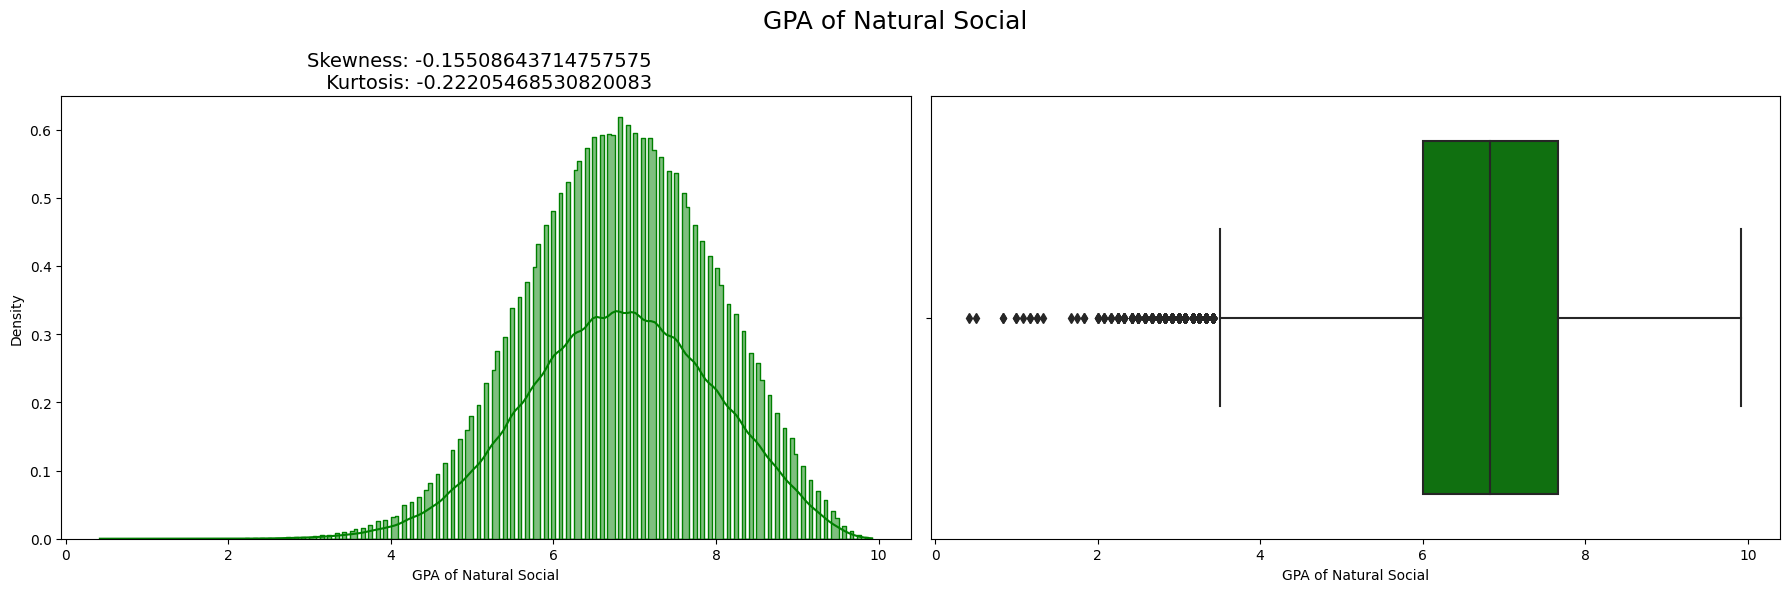

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=soc_features_21, kde=True, element="step", stat="density",color = 'green', ax=ax[0])

    sns.boxplot(x=score, data=soc_features_21,  ax=ax[1], color='g')
    ax[0].set_title(f"Skewness: {soc_features_21[score].skew()}  \n Kurtosis: {soc_features_21[score].kurt()}", fontsize=14, )

    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()
plot('GPA of Natural Social')

####**2022**

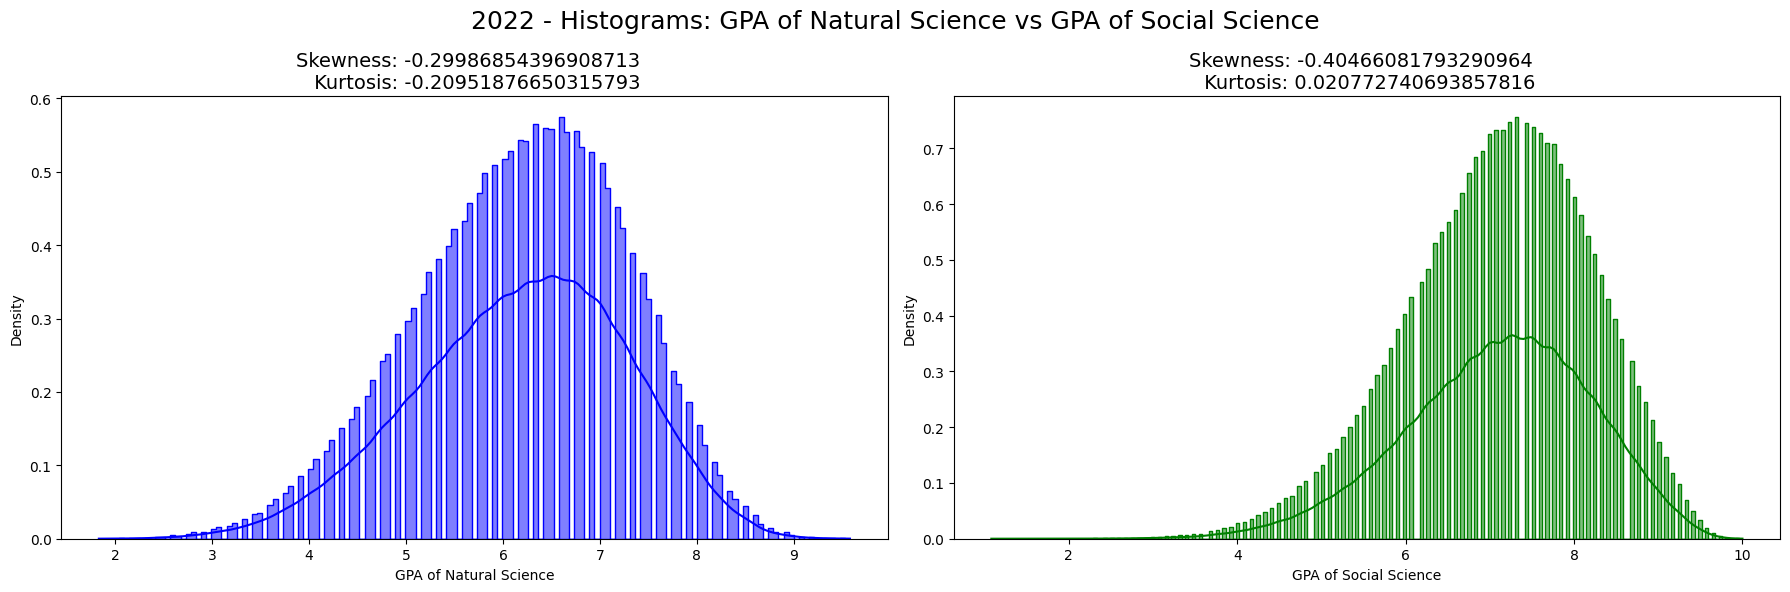

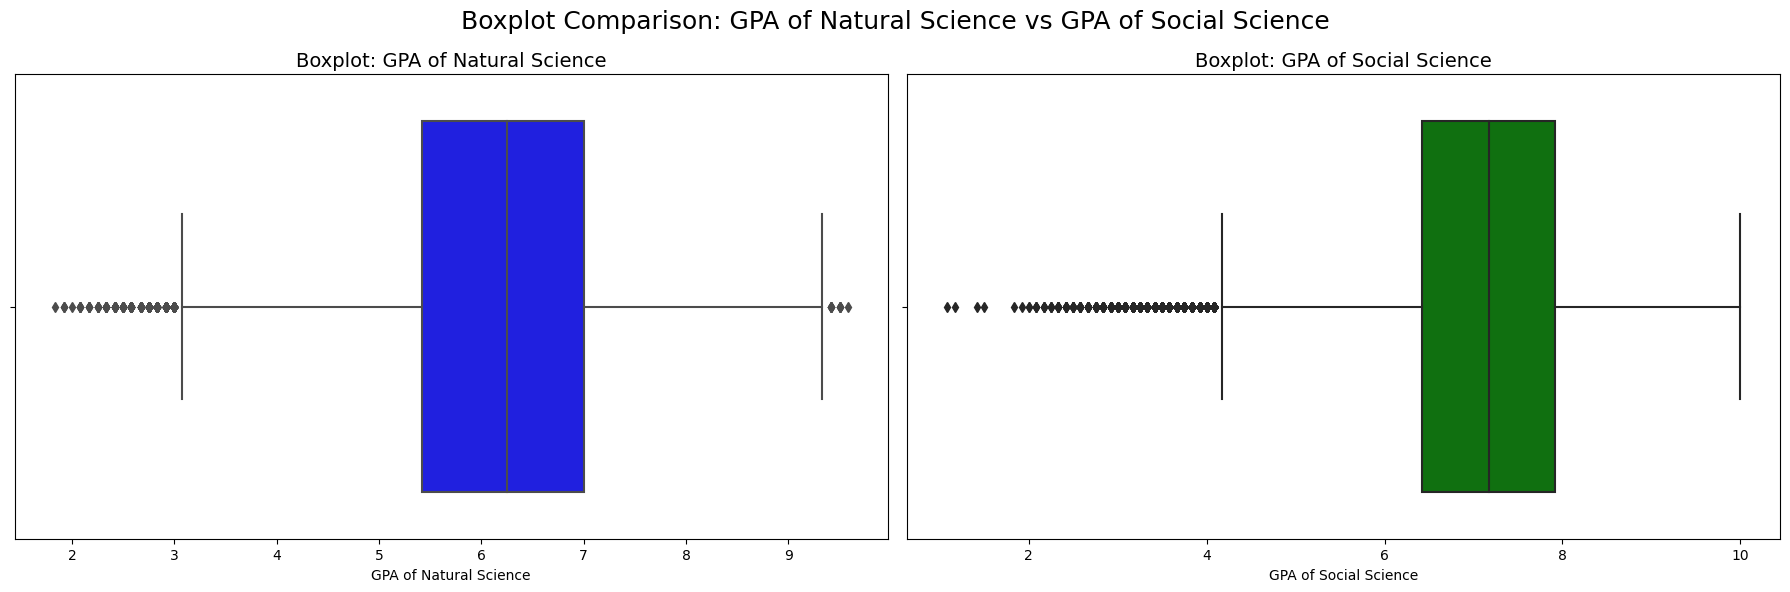

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot histogram for Natural Science
    sns.histplot(x=score1, data=data1, kde=True, element="step", stat="density", color=color1, ax=axes[0])
    axes[0].set_title(f"Skewness: {data1[score1].skew()}  \n Kurtosis: {data1[score1].kurt()}", fontsize=14)

    # Plot histogram for Social Science
    sns.histplot(x=score2, data=data2, kde=True, element="step", stat="density", color=color2, ax=axes[1])
    axes[1].set_title(f"Skewness: {data2[score2].skew()}  \n Kurtosis: {data2[score2].kurt()}", fontsize=14)

    plt.suptitle(f"2022 - Histograms: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

def plot_boxplot_combined(score1, score2, data1, data2, color1, color2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    # Plot boxplot for Natural Science
    sns.boxplot(x=score1, data=data1, ax=axes[0], color=color1)
    axes[0].set_title(f"Boxplot: {score1}", fontsize=14)

    # Plot boxplot for Social Science
    sns.boxplot(x=score2, data=data2, ax=axes[1], color=color2)
    axes[1].set_title(f"Boxplot: {score2}", fontsize=14)

    plt.suptitle(f"Boxplot Comparison: {score1} vs {score2}", fontsize=18)
    fig.tight_layout()
    plt.show()

# Assuming you have the dataframes sci_features_20 and soc_features_20 for each score
score1 = 'GPA of Natural Science'
score2 = 'GPA of Social Science'
color1 = 'blue'
color2 = 'green'

plot_combined(score1, score2, sci_features_22, soc_features_22, color1, color2)
plot_boxplot_combined(score1, score2, sci_features_22, soc_features_22, color1, color2)


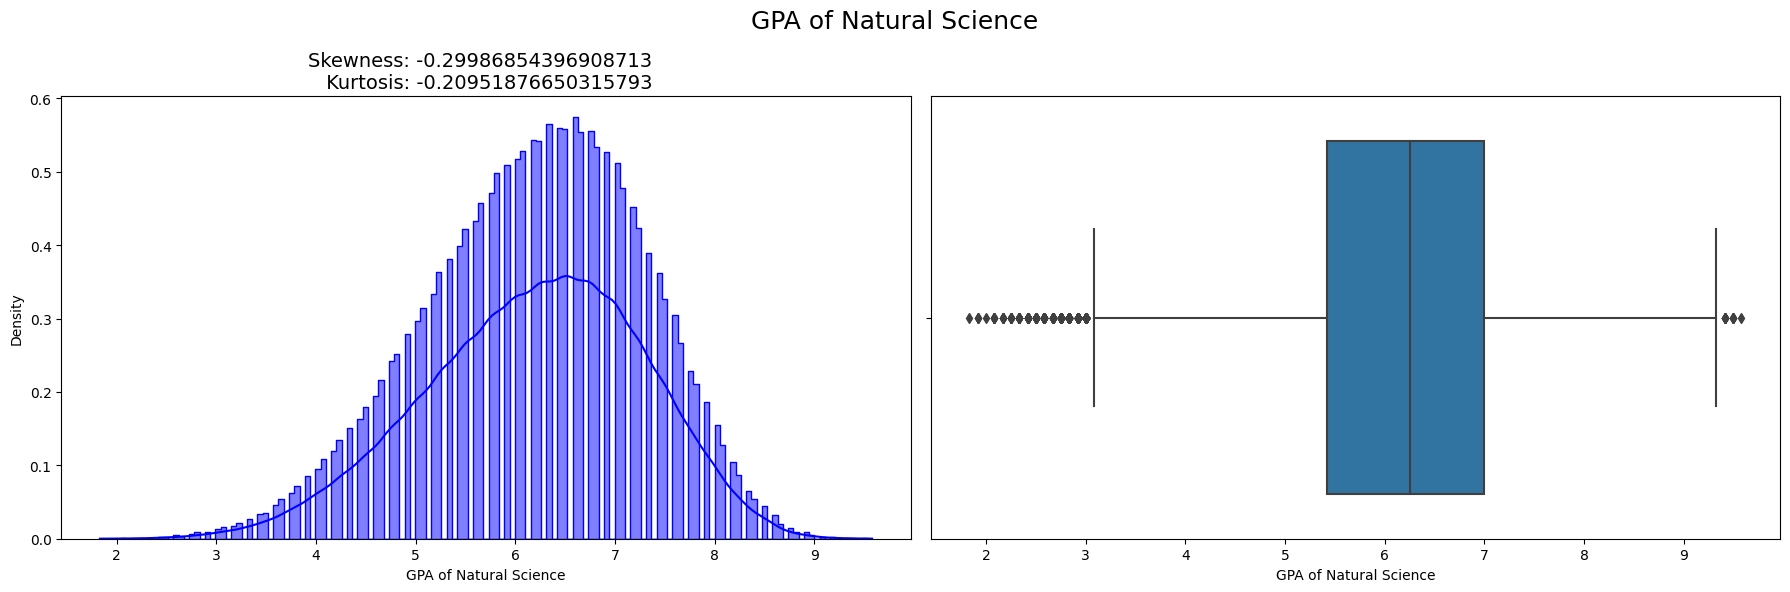

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=sci_features_22, kde=True, element="step", stat="density",color = 'blue', ax=ax[0])

    sns.boxplot(x=score, data=sci_features_22,  ax=ax[1])
    ax[0].set_title(f"Skewness: {sci_features_22[score].skew()}  \n Kurtosis: {sci_features_22[score].kurt()}", fontsize=14, )
    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()

plot('GPA of Natural Science')

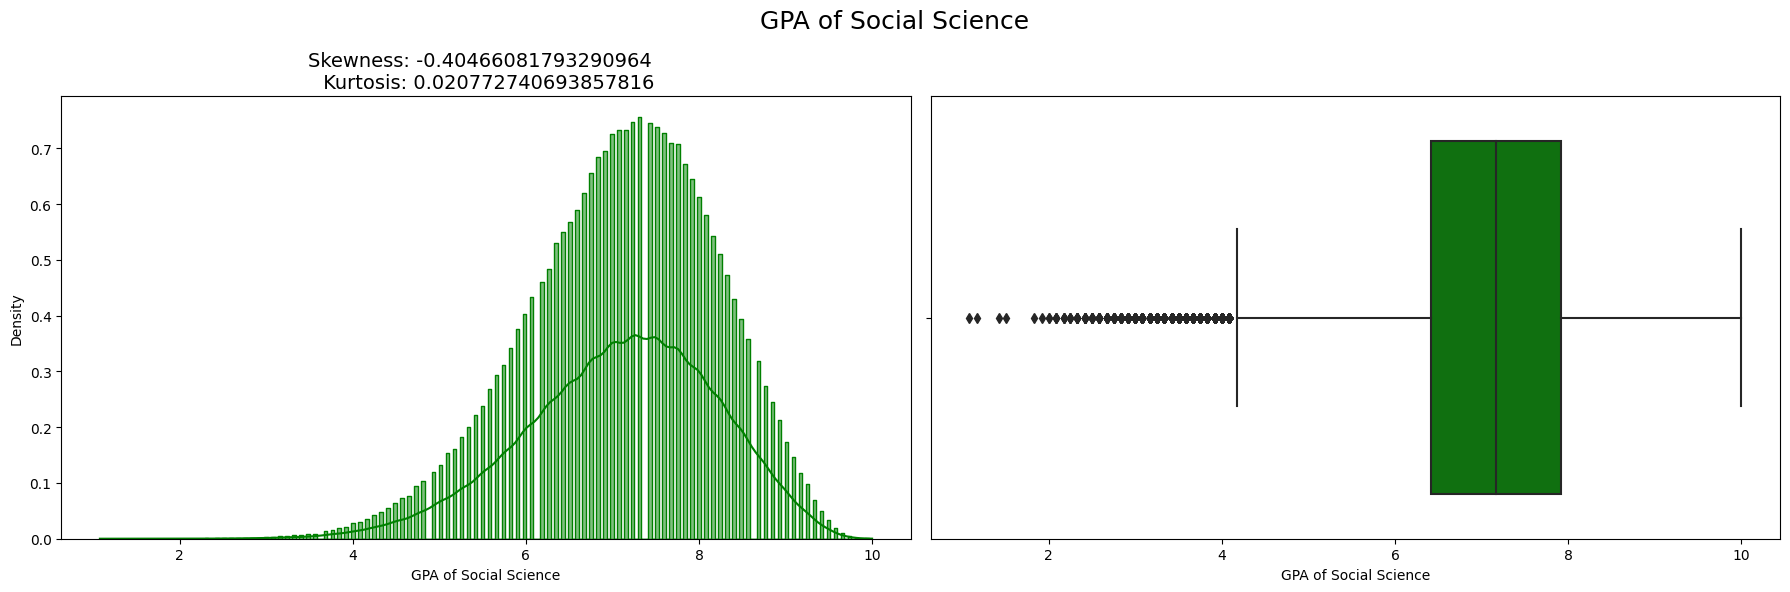

In [ ]:
def plot(score):
    fig, ax = plt.subplots(1, 2,figsize=(18,6), dpi=100)
    sns.histplot(x=score, data=soc_features_22, kde=True, element="step", stat="density",color = 'green', ax=ax[0])

    sns.boxplot(x=score, data=soc_features_22,  ax=ax[1], color='g')
    ax[0].set_title(f"Skewness: {soc_features_22[score].skew()}  \n Kurtosis: {soc_features_22[score].kurt()}", fontsize=14, )

    plt.suptitle(score, fontsize=18)
    fig.tight_layout()
    plt.show()
plot('GPA of Social Science')

##**3. Tự nhiên dễ bị điểm liệt hơn Xã hội**?

###**Two sample proportion hypothesis test**

####**2020**

In [ ]:
natural_science_subjects = ['Biological', 'Physics', 'Chemistry']
ns_20 = score_20[score_20['GPA of Natural Science'].notnull()].ID.count()
para_ns_20 = score_20[
    score_20['GPA of Natural Science'].notnull() &
    (score_20[natural_science_subjects].max(axis=1) <= 1)
]

# Sorting out score_20 for Social Science combination
social_science_subjects = ['Civic Education', 'Geography', 'History']
ss_20 = score_20[score_20['GPA of Natural Social'].notnull()].ID.count()
para_ss_20 = score_20[
    score_20['GPA of Natural Social'].notnull() &
    (score_20[social_science_subjects].max(axis=1) <= 1)
]
print('Total number of students who take Natural Science combination for national high school exam:',ns_20)
print("List of students with paralysis point in Natural Science year 2020:",para_ns_20.ID.count())
# print(para_ns_20)
print('Total number of students who take Social Science combination for national high school exam:',ss_20)
print("List of students with paralysis point in Natural Science year 2020:",para_ss_20.ID.count())
# if para_ss_20.ID.count()>0:
#   print(para_ss_20)

Total number of students who take Natural Science combination for national high school exam: 297576
List of students with paralysis point in Natural Science year 2020: 12
Total number of students who take Social Science combination for national high school exam: 568807
List of students with paralysis point in Natural Science year 2020: 25


The value of test statistic Z = -0.2452
p-value: 0.5968


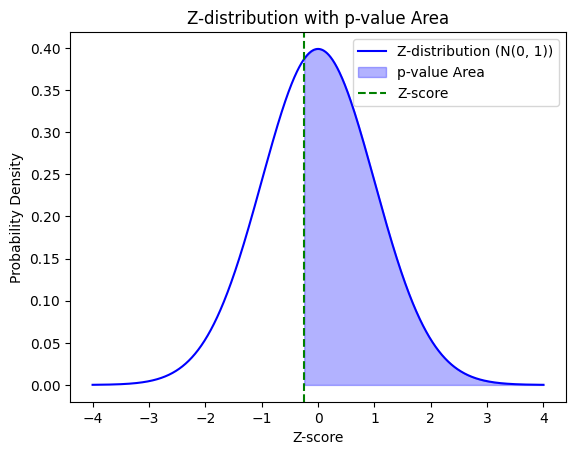

Fail to reject null hypothesis.
There is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science.


In [ ]:
def two_sample_proportions_test(successes1, sample_size1, successes2, sample_size2, confidence_level=0.95):
    # Check non-skewness criterion
    if sample_size1 < 10 or sample_size2 < 10:
        raise ValueError("Both sample sizes should be at least 10 for the normal approximation to be valid.")
    # Calculate the sample proportions
    p1 = successes1 / sample_size1
    p2 = successes2 / sample_size2

    # Calculate the pooled sample proportion
    p_pool = (successes1 + successes2) / (sample_size1 + sample_size2)

    # Calculate the standard error for the difference
    SE_diff = math.sqrt(p_pool * (1 - p_pool) * ((1 / sample_size1) + (1 / sample_size2)))

    # Calculate the Z-statistic
    Z = round((p1 - p2) / SE_diff,4)
    print('The value of test statistic Z =', Z)

    # Determine the critical Z-value based on the confidence level
    # For a 95% confidence level, the critical Z-value is approximately 1.96
    critical_Z = 1.96

    # Find p-value
    p_value = round(scipy.stats.norm.sf(Z),4)
    print('p-value:', p_value)

    # Make a decision on the null hypothesis
    if Z > critical_Z:
        # Reject the null hypothesis (Ha: p1 > p2)
        decision = "Reject null hypothesis.\nThere is evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."
    else:
        # Fail to reject the null hypothesis (H0: p1 = p2)
        decision = "Fail to reject null hypothesis.\nThere is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."

    # Create Z-distribution plot
    x = np.linspace(-4, 4, 1000)  # Values for the Z-distribution from -4 to 4 (adjust if needed)
    y = scipy.stats.norm.pdf(x, loc=0, scale=1)  # Probability Density Function (PDF) of Z-distribution

    fig, ax = plt.subplots()
    ax.plot(x, y, color='blue', label='Z-distribution (N(0, 1))')

    # Highlight the area corresponding to the p-value (shaded region)
    x_fill = np.linspace(Z, 4, 1000)  # Values from Z-score to the right tail
    y_fill = scipy.stats.norm.pdf(x_fill, loc=0, scale=1)
    ax.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label='p-value Area')

    # Set labels and title
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Probability Density')
    ax.set_title('Z-distribution with p-value Area')



    # Add vertical lines representing the Z-score
    ax.axvline(Z, color='green', linestyle='--', label='Z-score')

    # Add legend
    ax.legend()

    plt.show()

    return decision

result = two_sample_proportions_test(para_ns_20.ID.count(), ns_20, para_ss_20.ID.count(), ss_20)
print(result)



####**2021**

In [ ]:
natural_science_subjects = ['Biological', 'Physics', 'Chemistry']
ns_21 = score_21[score_21['GPA of Natural Science'].notnull()].ID.count()
para_ns_21 = score_21[
    score_21['GPA of Natural Science'].notnull() &
    (score_21[natural_science_subjects].max(axis=1) <= 1)
]

# Sorting out score_21 for Social Science combination
social_science_subjects = ['Civic Education', 'Geography', 'History']
ss_21 = score_21[score_21['GPA of Natural Social'].notnull()].ID.count()
para_ss_21 = score_21[
    score_21['GPA of Natural Social'].notnull() &
    (score_21[social_science_subjects].max(axis=1) <= 1)
]
print('Total number of students who take Natural Science combination for national high school exam:',ns_21)
print("List of students with paralysis point in Natural Science year 2021:",para_ns_21.ID.count())
# print(para_ns_21)
print('Total number of students who take Social Science combination for national high school exam:',ss_21)
print("List of students with paralysis point in Natural Science year 2021:",para_ss_21.ID.count())
# if para_ss_21.ID.count()>0:
#   print(para_ss_21)

Total number of students who take Natural Science combination for national high school exam: 89969
List of students with paralysis point in Natural Science year 2021: 0
Total number of students who take Social Science combination for national high school exam: 177098
List of students with paralysis point in Natural Science year 2021: 3


The value of test statistic Z= -1.2345
p-value: 0.8915


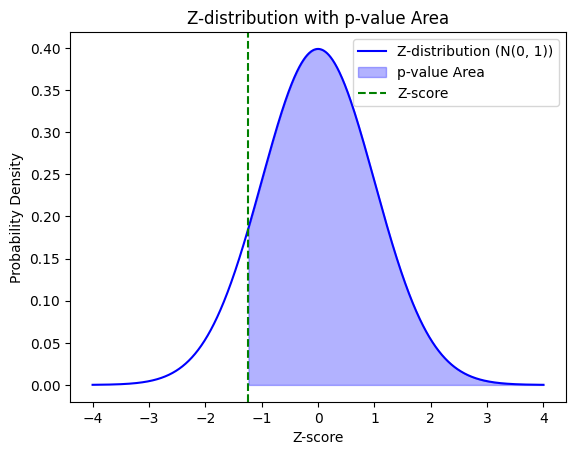

Fail to reject null hypothesis.
There is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science.


In [ ]:
def two_sample_proportions_test(successes1, sample_size1, successes2, sample_size2, confidence_level=0.95):
    # Check non-skewness criterion
    if sample_size1 < 10 or sample_size2 < 10:
        raise ValueError("Both sample sizes should be at least 10 for the normal approximation to be valid.")
    # Calculate the sample proportions
    p1 = successes1 / sample_size1
    p2 = successes2 / sample_size2

    # Calculate the pooled sample proportion
    p_pool = (successes1 + successes2) / (sample_size1 + sample_size2)

    # Calculate the standard error for the difference
    SE_diff = math.sqrt(p_pool * (1 - p_pool) * ((1 / sample_size1) + (1 / sample_size2)))

    # Calculate the Z-statistic
    Z= round((p1 - p2) / SE_diff,4)
    print('The value of test statistic Z=', Z)

    # Determine the critical Z-value based on the confidence level
    # For a 95% confidence level, the critical Z-value is approximately 1.96
    critical_Z = 1.96

    # Find p-value
    p_value = round(scipy.stats.norm.sf(Z),4)
    print('p-value:', p_value)

    # Make a decision on the null hypothesis
    if Z > critical_Z:
        # Reject the null hypothesis (Ha: p1 > p2)
        decision = "Reject null hypothesis.\nThere is evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."
    else:
        # Fail to reject the null hypothesis (H0: p1 = p2)
        decision = "Fail to reject null hypothesis.\nThere is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."

    # Create Z-distribution plot
    x = np.linspace(-4, 4, 1000)  # Values for the Z-distribution from -4 to 4 (adjust if needed)
    y = scipy.stats.norm.pdf(x, loc=0, scale=1)  # Probability Density Function (PDF) of Z-distribution

    fig, ax = plt.subplots()
    ax.plot(x, y, color='blue', label='Z-distribution (N(0, 1))')

    # Highlight the area corresponding to the p-value (shaded region)
    x_fill = np.linspace(Z, 4, 1000)  # Values from Z-score to the right tail
    y_fill = scipy.stats.norm.pdf(x_fill, loc=0, scale=1)
    ax.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label='p-value Area')

    # Set labels and title
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Probability Density')
    ax.set_title('Z-distribution with p-value Area')



    # Add vertical lines representing the Z-score
    ax.axvline(Z, color='green', linestyle='--', label='Z-score')

    # Add legend
    ax.legend()

    plt.show()

    return decision

result = two_sample_proportions_test(para_ns_21.ID.count(),ns_21,para_ss_21.ID.count(),ss_21)
print(result)

####**2022**

In [ ]:
natural_science_subjects = ['Biological', 'Physical', 'Chemistry']
ns_22 = score_22[score_22['GPA of Natural Science'].notnull()].ID.count()
para_ns_22 = score_22[
    score_22['GPA of Natural Science'].notnull() &
    (score_22[natural_science_subjects].max(axis=1) <= 1)
]

# Sorting out score_22 for Social Science combination
social_science_subjects = ['Civic education', 'GeographyCivic education', 'History']
ss_22 = score_22[score_22['GPA of Social Science'].notnull()].ID.count()
para_ss_22 = score_22[
    score_22['GPA of Social Science'].notnull() &
    (score_22[social_science_subjects].max(axis=1) <= 1)
]
print('Total number of students who take Natural Science combination for national high school exam:',ns_22)
print("List of students with paralysis point in Natural Science year 2022:",para_ns_22.ID.count())
# print(para_ns_22)
print('Total number of students who take Social Science combination for national high school exam:',ss_22)
print("List of students with paralysis point in Social Science year 2022:",para_ss_22.ID.count())
# if para_ss_22.ID.count()>0:
#   print(para_ss_22)

Total number of students who take Natural Science combination for national high school exam: 94450
List of students with paralysis point in Natural Science year 2022: 0
Total number of students who take Social Science combination for national high school exam: 171081
List of students with paralysis point in Social Science year 2022: 2


The value of test statistic Z = -2.0375
p-value: 0.9792


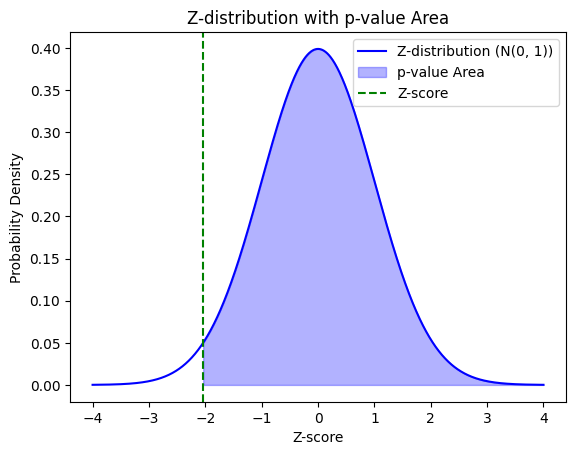

Fail to reject null hypothesis.
There is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science.


In [ ]:
def two_sample_proportions_test(successes1, sample_size1, successes2, sample_size2, confidence_level=0.95):
    # Check non-skewness criterion
    if sample_size1 < 10 or sample_size2 < 10:
        raise ValueError("Both sample sizes should be at least 10 for the normal approximation to be valid.")
    # Calculate the sample proportions
    p1 = successes1 / sample_size1
    p2 = successes2 / sample_size2

    # Calculate the pooled sample proportion
    p_pool = (successes1 + successes2) / (sample_size1 + sample_size2)

    # Calculate the standard error for the difference
    SE_diff = math.sqrt(p_pool * (1 - p_pool) * ((1 / sample_size1) + (1 / sample_size2)))

    # Calculate the Z-statistic
    Z= round((p1 - p2) / SE_diff,4)
    print('The value of test statistic Z =', Z)

    # Determine the critical Z-value based on the confidence level
    # For a 95% confidence level, the critical Z-value is approximately 1.96
    critical_Z = 1.96

    # Find p-value
    p_value = round(scipy.stats.norm.sf(Z),4)
    print('p-value:', p_value)

    # Make a decision on the null hypothesis
    if Z > critical_Z:
        # Reject the null hypothesis (Ha: p1 > p2)
        decision = "Reject null hypothesis.\nThere is evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."
    else:
        # Fail to reject the null hypothesis (H0: p1 = p2)
        decision = "Fail to reject null hypothesis.\nThere is no evidence to suggest that the true proportion of students with paralysis point in Natural Science is greater than the true proportion of students with paralysis point in Social Science."

    # Create Z-distribution plot
    x = np.linspace(-4, 4, 1000)  # Values for the Z-distribution from -4 to 4 (adjust if needed)
    y = scipy.stats.norm.pdf(x, loc=0, scale=1)  # Probability Density Function (PDF) of Z-distribution

    fig, ax = plt.subplots()
    ax.plot(x, y, color='blue', label='Z-distribution (N(0, 1))')

    # Highlight the area corresponding to the p-value (shaded region)
    x_fill = np.linspace(Z, 4, 1000)  # Values from Z-score to the right tail
    y_fill = scipy.stats.norm.pdf(x_fill, loc=0, scale=1)
    ax.fill_between(x_fill, y_fill, color='blue', alpha=0.3, label='p-value Area')

    # Set labels and title
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Probability Density')
    ax.set_title('Z-distribution with p-value Area')



    # Add vertical lines representing the Z-score
    ax.axvline(Z, color='green', linestyle='--', label='Z-score')

    # Add legend
    ax.legend()

    plt.show()

    return decision



result = two_sample_proportions_test(para_ns_22.ID.count(),ns_22,para_ss_20.ID.count(),ss_20)
print(result)

##**5. Correlation**

###**2020**

                        GPA of Natural Science
Biological                            0.662763
Physics                               0.679838
Chemistry                             0.835838
Math                                  0.622316
Foreign Language                      0.270063
Literature                            0.226563
GPA of Natural Science                1.000000


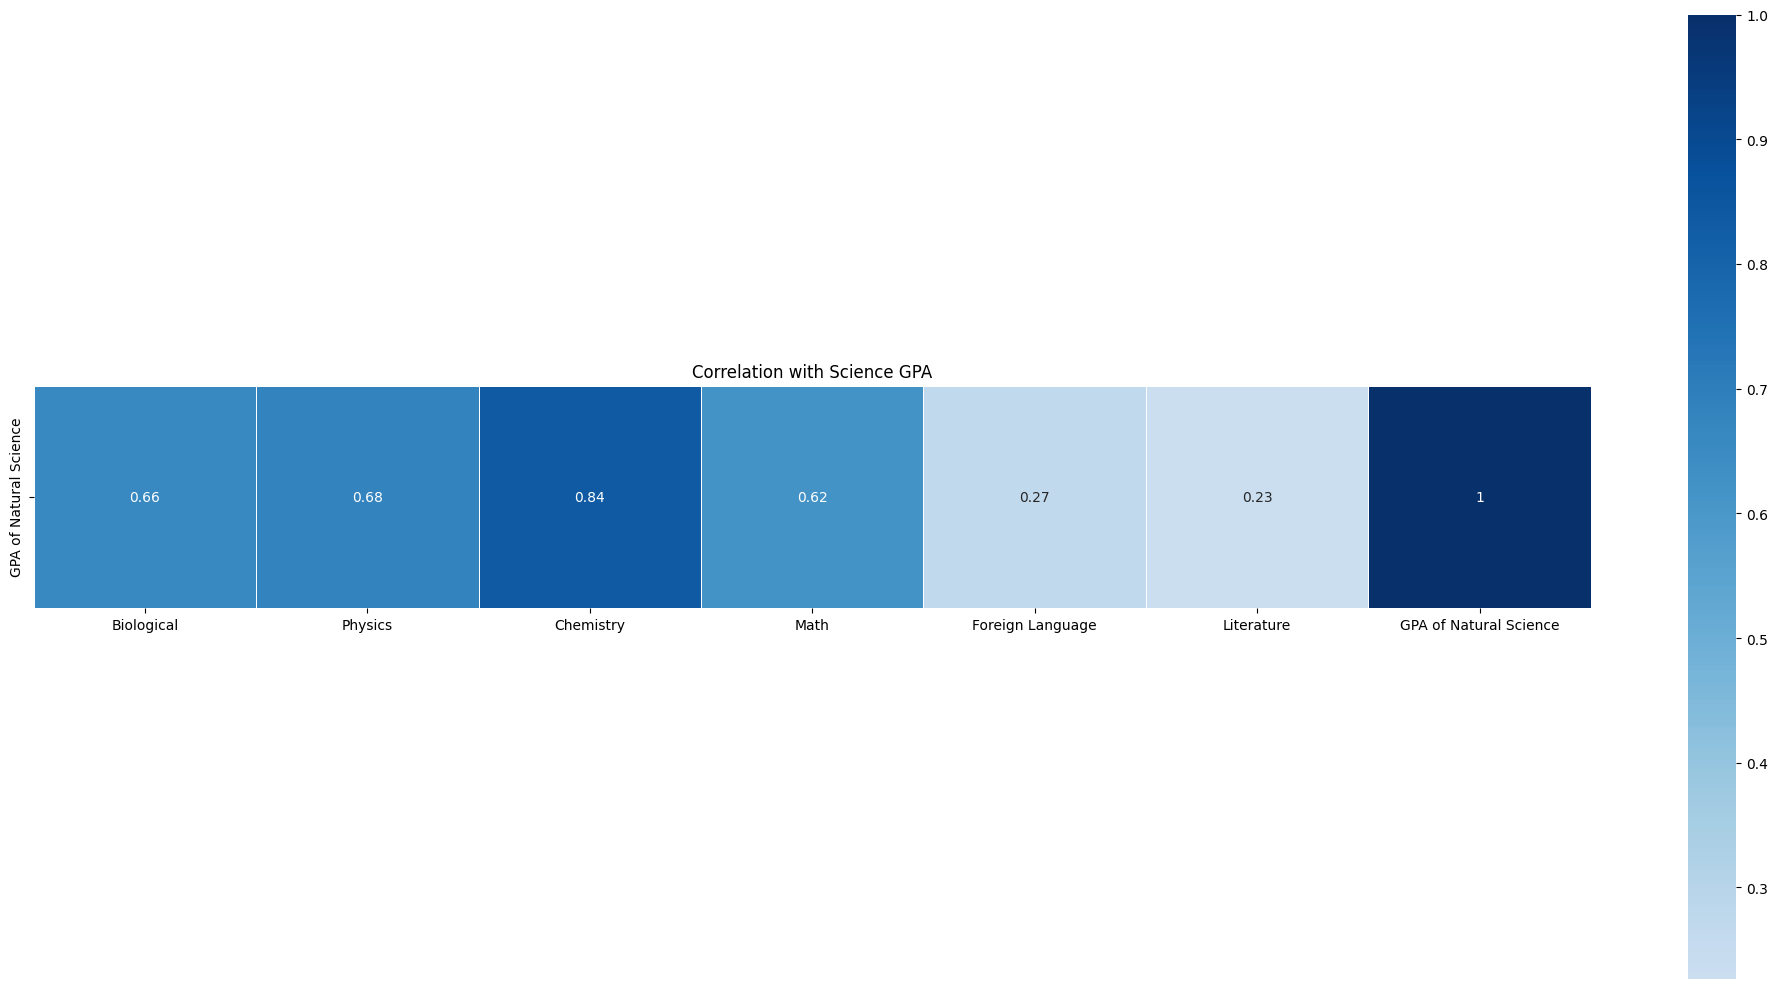

In [ ]:
sci_cor = sci_features_20.corr()[['GPA of Natural Science']]
print(sci_cor)
plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(sci_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=0.5,cmap = 'Blues')

plt.title('Correlation with Science GPA')
plt.tight_layout()
plt.show()

                       GPA of Natural Social
Civic Education                     0.794147
Geography                           0.836065
History                             0.871035
Math                                0.517491
Foreign Language                    0.395125
Literature                          0.483497
GPA of Natural Social               1.000000


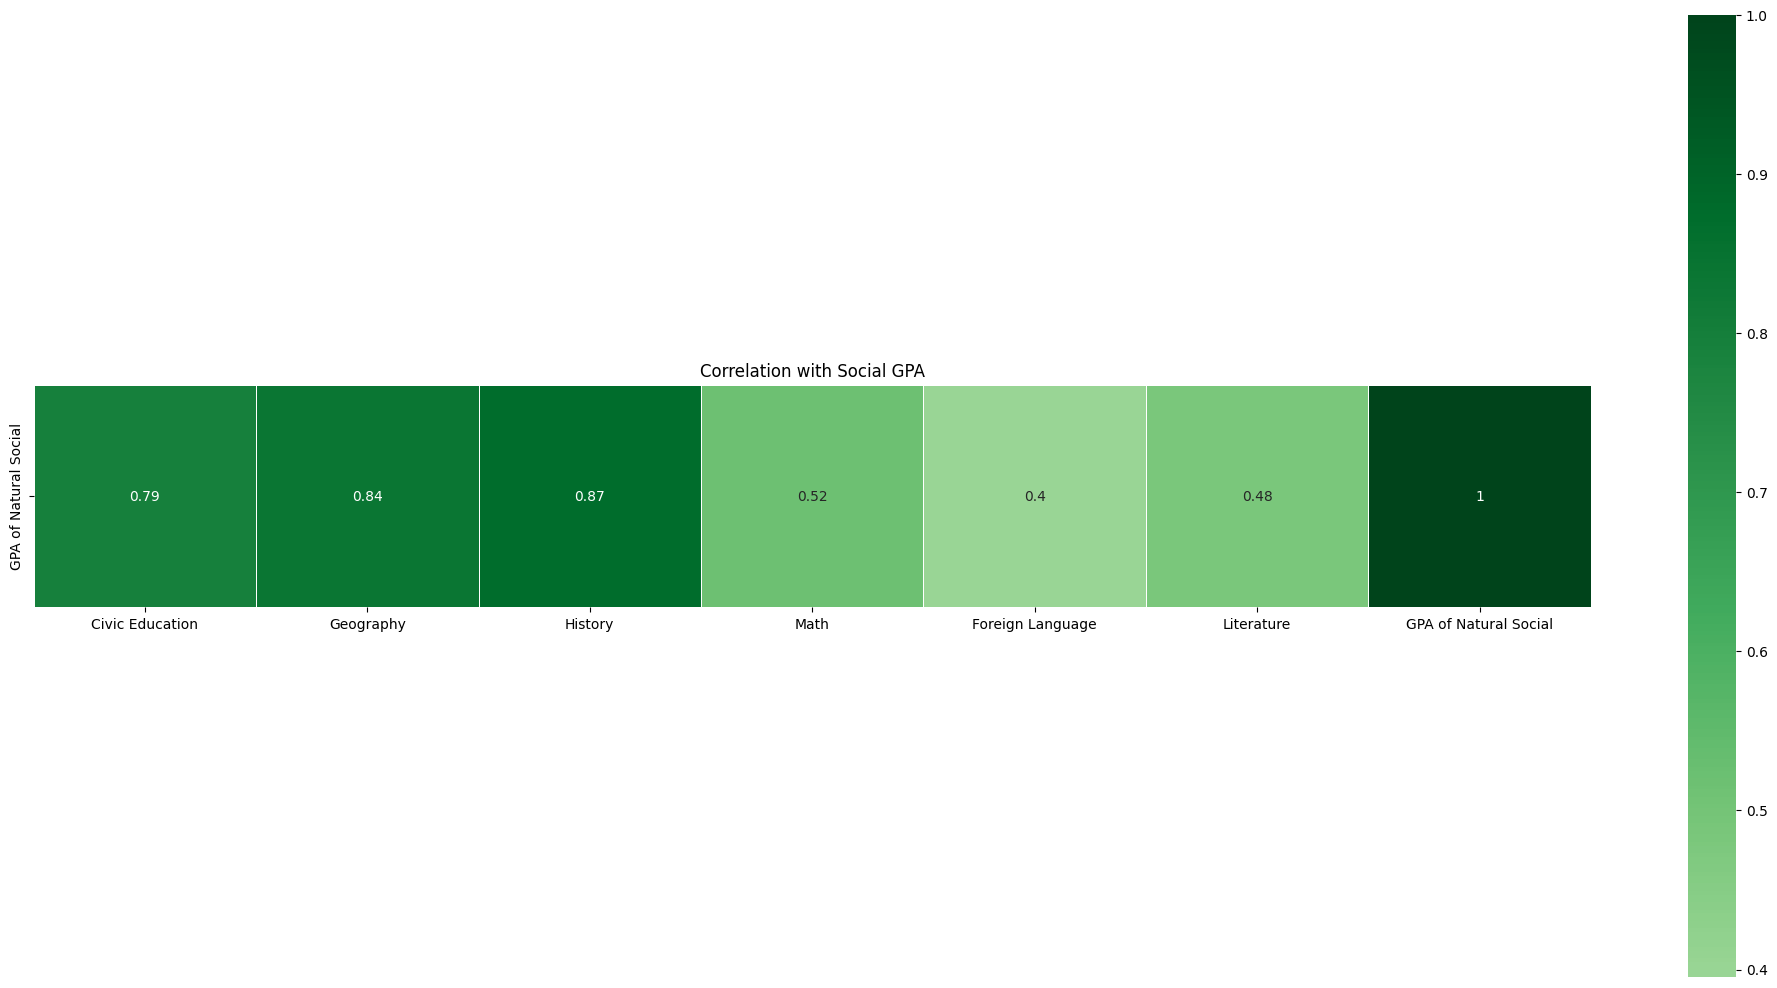

In [ ]:
soc_cor = soc_features_20.corr()[['GPA of Natural Social']]
print(soc_cor)
plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(soc_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = 'Greens')

plt.title('Correlation with Social GPA')
plt.tight_layout()
plt.show()

###**2021**

                        GPA of Natural Science
Biological                            0.681731
Physics                               0.627088
Chemistry                             0.818492
Math                                  0.560564
Foreign Language                      0.218822
Literature                            0.211738
GPA of Natural Science                1.000000


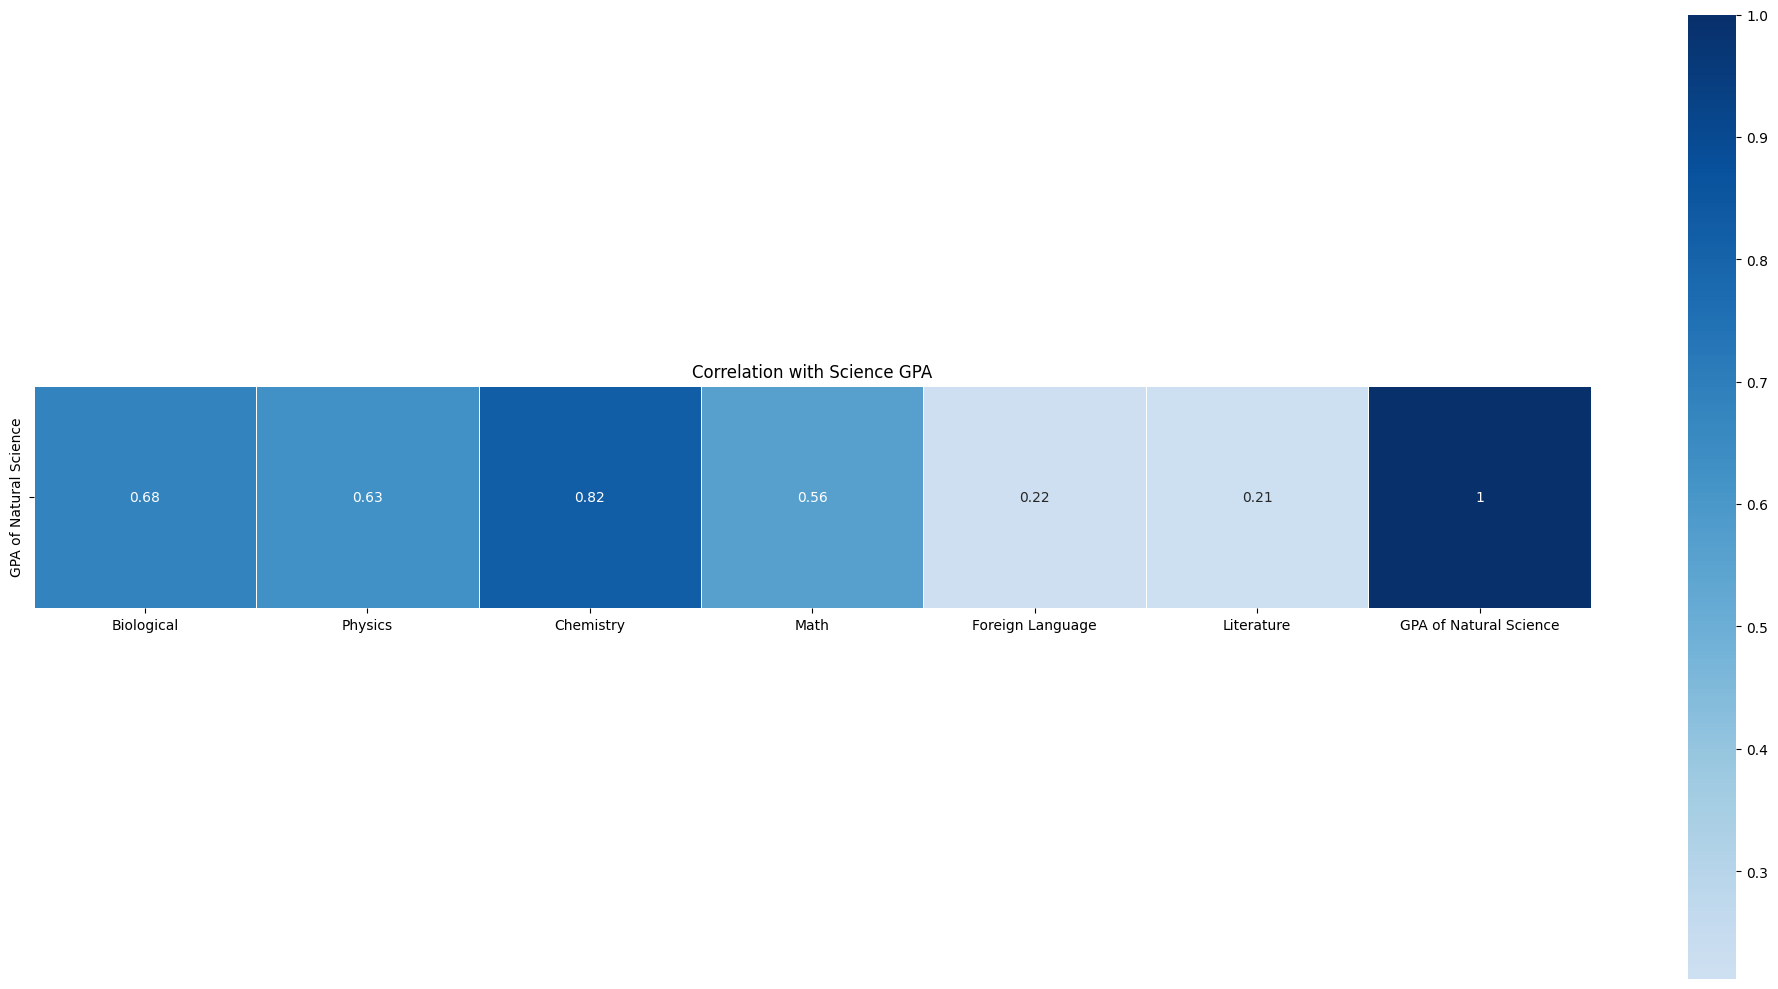

In [ ]:
sci_cor = sci_features_21.corr()[['GPA of Natural Science']]
print(sci_cor)
plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(sci_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = 'Blues')

plt.title('Correlation with Science GPA')
plt.tight_layout()
plt.show()

                       GPA of Natural Social
Civic Education                     0.787157
Geography                           0.844322
History                             0.891005
Math                                0.449918
Foreign Language                    0.382146
Literature                          0.443957
GPA of Natural Social               1.000000


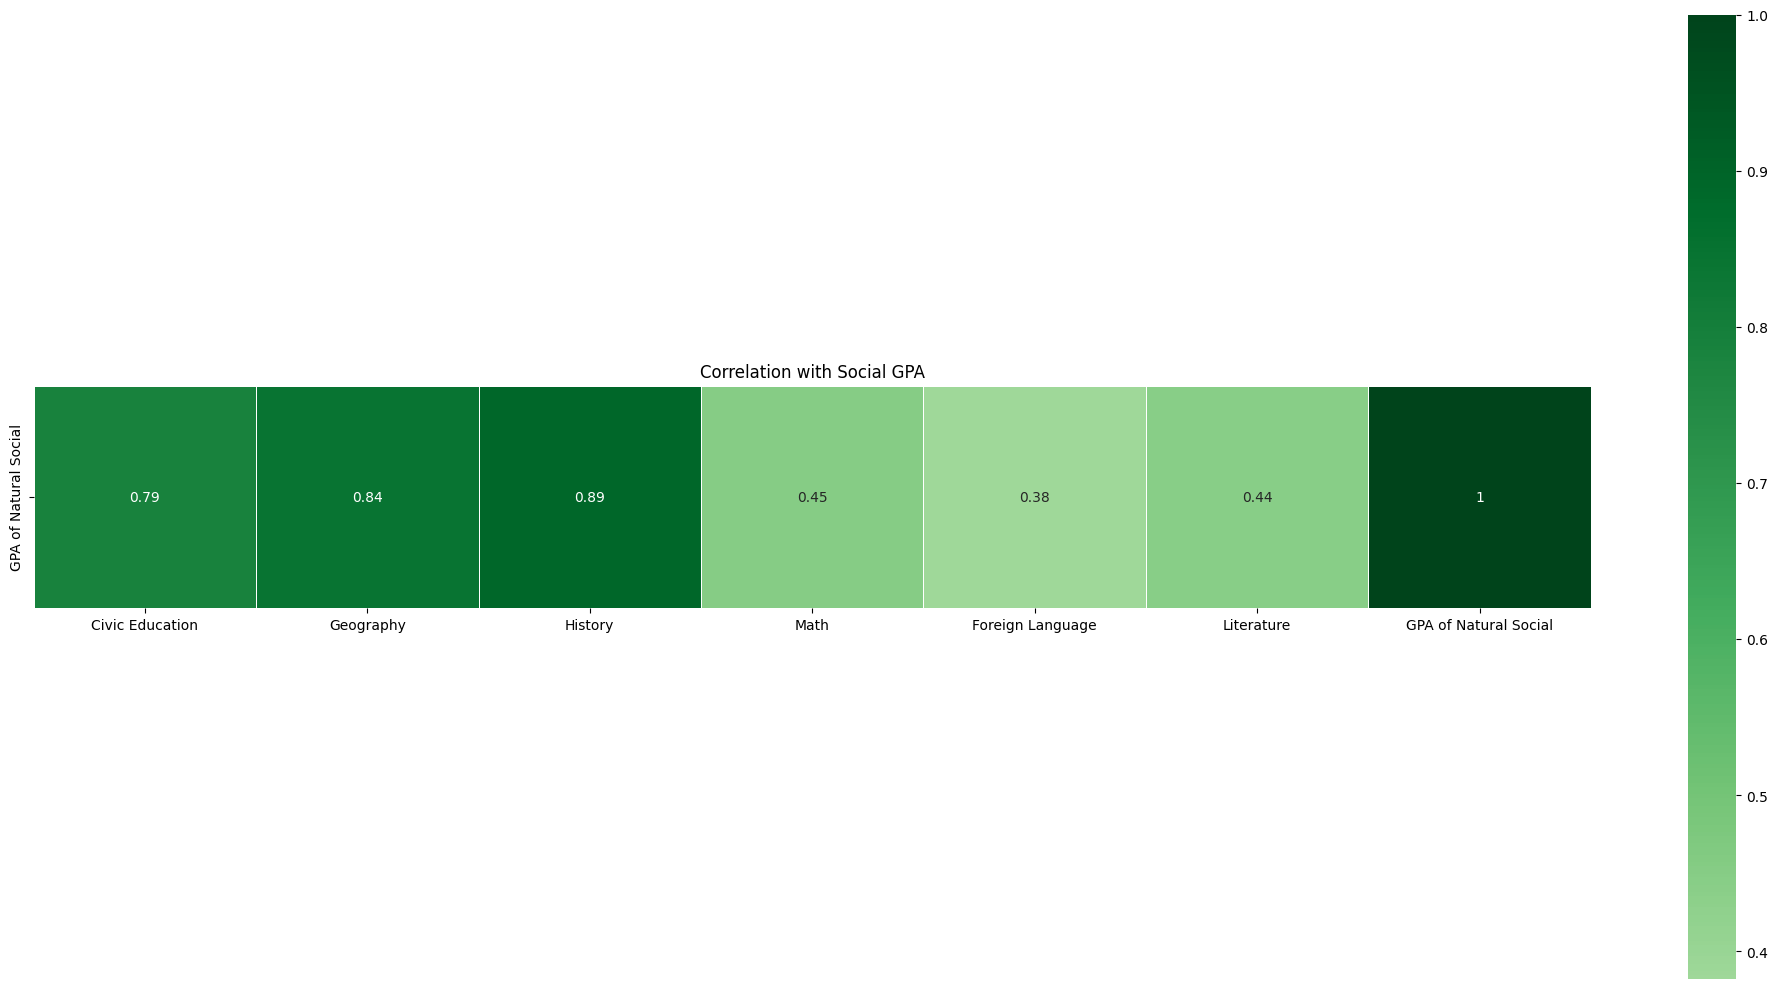

In [ ]:
soc_cor = soc_features_21.corr()[['GPA of Natural Social']]
print(soc_cor)

plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(soc_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = 'Greens')

plt.title('Correlation with Social GPA')
plt.tight_layout()
plt.show()

###**2022**

                        GPA of Natural Science
Biological                            0.705586
Physical                              0.656377
Chemistry                             0.818933
Math                                  0.589139
Foreign Language                      0.298161
Literature                            0.253831
GPA of Natural Science                1.000000


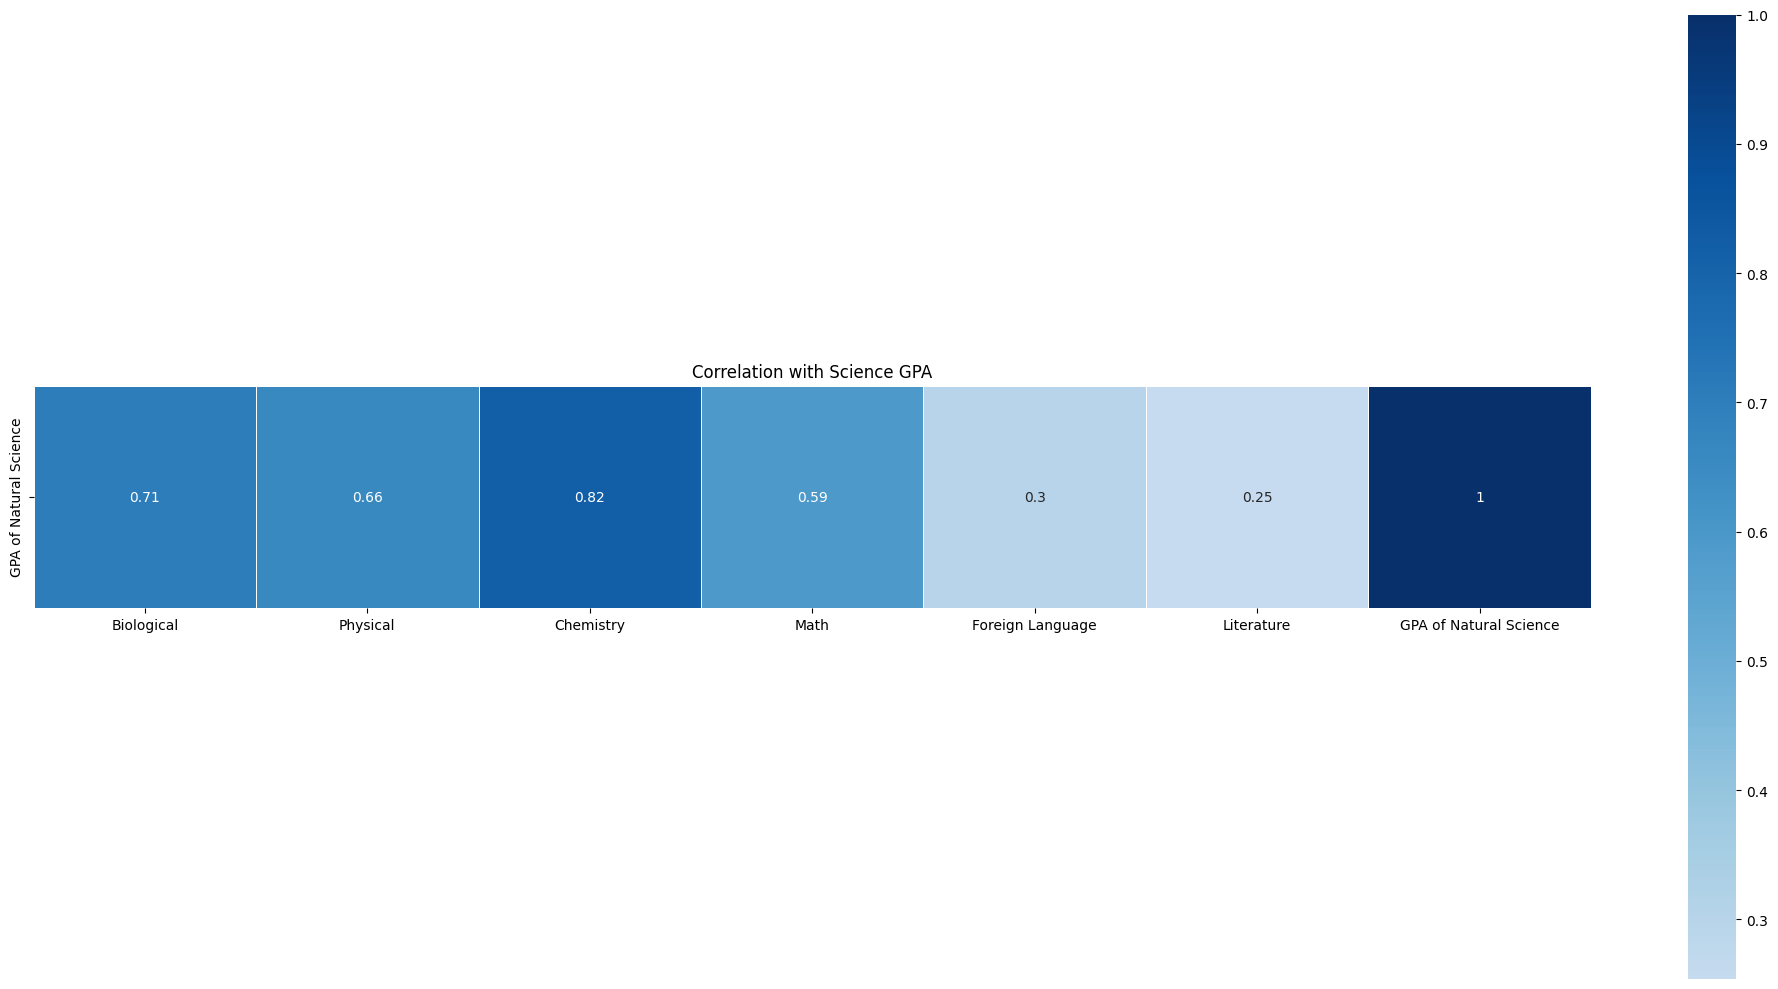

In [ ]:
sci_cor = sci_features_22.corr()[['GPA of Natural Science']]
print(sci_cor)
plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(sci_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = 'Blues')

plt.title('Correlation with Science GPA')
plt.tight_layout()
plt.show()

                          GPA of Social Science
Civic education                        0.805917
GeographyCivic education               0.842567
History                                0.889470
Math                                   0.502079
Foreign Language                       0.426541
Literature                             0.504424
GPA of Social Science                  1.000000


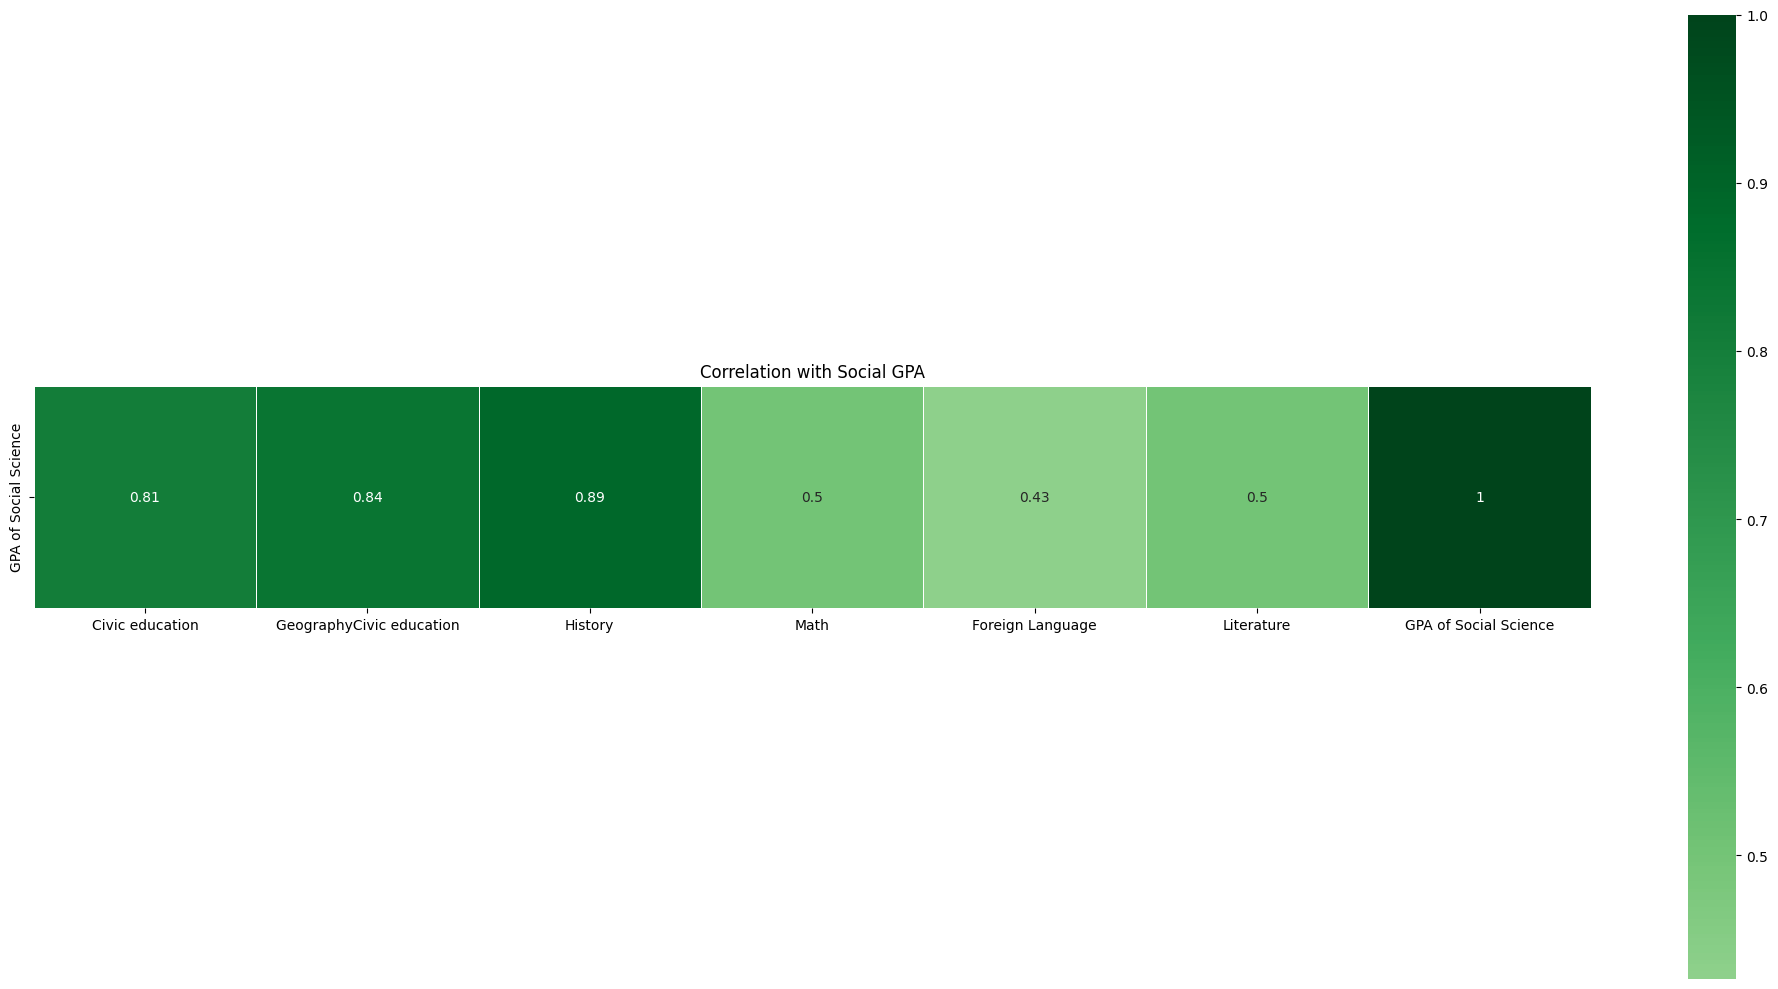

In [ ]:
soc_cor = soc_features_22.corr()[['GPA of Social Science']]
print(soc_cor)
plt.figure(figsize=(20,10))

sns.color_palette
sns.heatmap(soc_cor.T,annot = True, center=0.5, vmax=1,
            square=True, linewidths=.5,cmap = 'Greens')

plt.title('Correlation with Social GPA')
plt.tight_layout()
plt.show()

#Code cũ

In [ ]:
score_20

,Unnamed: 0,ID,Geography,Civic Education,Chemistry,Physics,Foreign Language,Biological,History,Math,Literature,Province/City,GPA of Natural Science,GPA of Natural Social
0,0,18014547.0,7.00,6.50,NaN,NaN,4.2,NaN,4.75,6.4,6.75,BẮC GIANG,NaN,6.08
1,1,18014530.0,7.75,7.75,NaN,NaN,2.8,NaN,3.75,7.6,6.00,BẮC GIANG,NaN,6.42
2,2,18014521.0,6.50,NaN,NaN,NaN,NaN,NaN,4.00,4.8,4.75,BẮC GIANG,NaN,5.25
3,3,18014517.0,8.00,9.50,NaN,NaN,5.8,NaN,8.25,8.0,7.00,BẮC GIANG,NaN,8.58
4,4,18014523.0,NaN,NaN,8.5,8.00,4.0,5.00,NaN,8.2,6.50,BẮC GIANG,7.17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263997,263997,41006722.0,7.00,8.25,NaN,NaN,5.6,NaN,5.75,4.8,5.75,KHÁNH HÒA,NaN,7.00
263998,263998,41006726.0,NaN,NaN,4.0,6.75,2.8,5.75,NaN,5.8,6.50,KHÁNH HÒA,5.50,NaN
263999,263999,41006721.0,NaN,NaN,4.0,5.50,6.4,5.25,NaN,6.2,6.50,KHÁNH HÒA,4.92,NaN
264000,264000,41006727.0,4.50,6.75,NaN,NaN,3.8,NaN,3.75,4.6,6.50,KHÁNH HÒA,NaN,5.00


In [ ]:
vp = score_20[(score_20['Province/City']=="VĨNH PHÚC")]
nd = score_20[(score_20['Province/City']=="TPHCM")]


In [ ]:
vp.describe()

,Unnamed: 0,ID,Geography,Civic Education,Chemistry,Physics,Foreign Language,Biological,History,Math,Literature,GPA of Natural Science,GPA of Natural Social
count,4061.00000,4.061000e+03,2846.000000,1730.000000,1214.000000,1214.000000,2937.000000,1214.000000,2846.000000,4061.000000,4060.000000,1214.000000,2846.000000
mean,180171.00000,1.600204e+07,7.083978,8.724711,7.075988,7.235379,5.428941,5.914333,5.682186,7.046688,6.968697,6.741960,6.766866
std,1172.45405,1.173913e+03,1.148707,0.835936,1.662546,1.439363,1.925200,1.420964,1.716063,1.849816,1.190042,1.148106,1.357577
min,178141.00000,1.600000e+07,2.500000,3.750000,2.000000,1.750000,1.000000,2.000000,1.250000,0.800000,1.500000,2.250000,2.500000
25%,179156.00000,1.600103e+07,6.250000,8.250000,6.000000,6.500000,3.800000,5.000000,4.500000,5.800000,6.250000,6.080000,5.770000
50%,180171.00000,1.600204e+07,7.250000,8.750000,7.500000,7.500000,5.200000,5.750000,5.500000,7.600000,7.000000,6.920000,6.830000
75%,181186.00000,1.600306e+07,7.750000,9.250000,8.250000,8.250000,7.000000,6.750000,6.937500,8.600000,7.750000,7.580000,7.750000
max,182201.00000,1.600407e+07,10.000000,10.000000,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,9.500000,9.250000,9.830000


In [ ]:
nd.describe()

,Unnamed: 0,ID,Geography,Civic Education,Chemistry,Physics,Foreign Language,Biological,History,Math,Literature,GPA of Natural Science,GPA of Natural Social
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Frequency of Natural Science and Natural Social
TN_20 = score_20["GPA of Natural Science"].count()
XH_20 = score_20["GPA of Natural Social"].count()
print(TN_20, XH_20)

93388 169345


In [ ]:
score_20[score_20['Province/City']=='HỒ CHÍ MINH'][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count() +score_20[score_20['Province/City']=='HỒ CHÍ MINH'][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
# hn['GPA of Natural Science'].count()

29530

In [ ]:
provinces = score_20['Province/City']
elements = ['BẮC GIANG', 'YÊN BÁI', 'ĐỒNG THÁP', 'AN GIANG', 'BÌNH DƯƠNG','QUẢNG NINH', 'ĐỒNG NAI', 'HÀ NỘI', 'CÀ MAU', 'BÀ RỊA – VŨNG TÀU','CẦN THƠ', 'LÀO CAI', 'ĐĂK NÔNG', 'THÁI NGUYÊN', 'HÀ NAM', 'HỒ CHÍ MINH', 'VĨNH LONG', 'NAM ĐỊNH', 'NINH THUẬN', 'ĐIỆN BIÊN','NGHỆ AN', 'HƯNG YÊN', 'TIỀN GIANG', 'BẠC LIÊU', 'QUẢNG NGÃI','TÂY NINH', 'BÌNH THUẬN', 'CAO BẰNG', 'NINH BÌNH', 'HÀ TĨNH']
unique_elements = []
for element in provinces:
    # Check if the element is already in the unique_elements list
    if element not in elements:
        # If the element is not in the unique_elements list, add it
        unique_elements.append(element)

# Print the result
print(provinces)

0         BẮC GIANG
1         BẮC GIANG
2         BẮC GIANG
3         BẮC GIANG
4         BẮC GIANG
            ...    
263997    KHÁNH HÒA
263998    KHÁNH HÒA
263999    KHÁNH HÒA
264000    KHÁNH HÒA
264001          NaN
Name: Province/City, Length: 264002, dtype: object


##2020

In [ ]:
# Data cleaning steps (optional)
score_20['Province/City'] = score_20['Province/City'].str.strip().str.upper()

# Get the list of unique provinces without repetition
unique_provinces_20 = score_20['Province/City'].unique()

print(unique_provinces_20)

['BẮC GIANG' 'YÊN BÁI' 'ĐỒNG THÁP' 'AN GIANG' 'BÌNH DƯƠNG' 'QUẢNG NINH'
 'ĐỒNG NAI' 'HÀ NỘI' 'CÀ MAU' 'BÀ RỊA – VŨNG TÀU' 'CẦN THƠ' 'LÀO CAI'
 'ĐĂK NÔNG' 'THÁI NGUYÊN' 'HÀ NAM' 'HỒ CHÍ MINH' 'VĨNH LONG' 'NAM ĐỊNH'
 'NINH THUẬN' 'ĐIỆN BIÊN' 'NGHỆ AN' 'HƯNG YÊN' 'TIỀN GIANG' 'BẠC LIÊU'
 'QUẢNG NGÃI' 'TÂY NINH' 'BÌNH THUẬN' 'CAO BẰNG' 'NINH BÌNH' 'HÀ TĨNH'
 'ĐẮK LẮK' 'HẢI PHÒNG' 'BẾN TRE' 'VĨNH PHÚC' 'HÒA BÌNH' 'QUẢNG BÌNH'
 'KIÊN GIANG' 'THỪA THIÊN - HUẾ' 'GIA LAI' 'SÓC TRĂNG' 'PHÚ THỌ'
 'BÌNH PHƯỚC' 'LONG AN' 'KHÁNH HÒA' 'LÂM ĐỒNG' 'QUẢNG NAM' 'KON TUM'
 'THANH HÓA' 'TRÀ VINH' 'BẮC NINH' 'BÌNH ĐỊNH' 'BẮC KẠN' 'LẠNG SƠN'
 'PHÚ YÊN' 'HẬU GIANG' 'THÁI BÌNH' 'SƠN LA' 'TUYÊN QUANG' 'QUẢNG TRỊ'
 'HÀ GIANG' 'HẢI DƯƠNG' 'LAI CHÂU' nan]


In [ ]:
provinces = ['BẮC GIANG', 'YÊN BÁI', 'ĐỒNG THÁP', 'AN GIANG', 'BÌNH DƯƠNG', 'QUẢNG NINH',
             'ĐỒNG NAI', 'HÀ NỘI', 'CÀ MAU', 'BÀ RỊA – VŨNG TÀU', 'CẦN THƠ', 'LÀO CAI',
             'ĐĂK NÔNG', 'THÁI NGUYÊN', 'HÀ NAM', 'HỒ CHÍ MINH', 'VĨNH LONG', 'NAM ĐỊNH',
             'NINH THUẬN', 'ĐIỆN BIÊN', 'NGHỆ AN', 'HƯNG YÊN', 'TIỀN GIANG', 'BẠC LIÊU',
             'QUẢNG NGÃI', 'TÂY NINH', 'BÌNH THUẬN', 'CAO BẰNG', 'NINH BÌNH', 'HÀ TĨNH',
             'ĐẮK LẮK', 'HẢI PHÒNG', 'BẾN TRE', 'VĨNH PHÚC', 'HÒA BÌNH', 'QUẢNG BÌNH',
             'KIÊN GIANG', 'THỪA THIÊN - HUẾ', 'GIA LAI', 'SÓC TRĂNG', 'PHÚ THỌ',
             'BÌNH PHƯỚC', 'LONG AN', 'KHÁNH HÒA', 'LÂM ĐỒNG', 'QUẢNG NAM', 'KON TUM',
             'THANH HÓA', 'TRÀ VINH', 'BẮC NINH', 'BÌNH ĐỊNH', 'BẮC KẠN', 'LẠNG SƠN',
             'PHÚ YÊN', 'HẬU GIANG', 'THÁI BÌNH', 'SƠN LA', 'TUYÊN QUANG', 'QUẢNG TRỊ',
             'HÀ GIANG', 'HẢI DƯƠNG', 'LAI CHÂU']

excluded_provinces = ['ĐIỆN BIÊN', 'LAI CHÂU', 'SƠN LA', 'HÒA BÌNH', 'HÀ GIANG', 'CAO BẰNG',
                     'LÀO CAI', 'BẮC KẠN', 'LẠNG SƠN', 'TUYÊN QUANG', 'YÊN BÁI', 'THÁI NGUYÊN',
                     'PHÚ THỌ', 'BẮC GIANG', 'QUẢNG NINH', 'KON TUM', 'GIA LAI', 'ĐẮK LẮK',
                     'ĐẮK NÔNG', 'LÂM ĐỒNG']

filtered_provinces = np.array([province for province in provinces if province not in excluded_provinces])
print((filtered_provinces))


['ĐỒNG THÁP' 'AN GIANG' 'BÌNH DƯƠNG' 'ĐỒNG NAI' 'HÀ NỘI' 'CÀ MAU'
 'BÀ RỊA – VŨNG TÀU' 'CẦN THƠ' 'ĐĂK NÔNG' 'HÀ NAM' 'HỒ CHÍ MINH'
 'VĨNH LONG' 'NAM ĐỊNH' 'NINH THUẬN' 'NGHỆ AN' 'HƯNG YÊN' 'TIỀN GIANG'
 'BẠC LIÊU' 'QUẢNG NGÃI' 'TÂY NINH' 'BÌNH THUẬN' 'NINH BÌNH' 'HÀ TĨNH'
 'HẢI PHÒNG' 'BẾN TRE' 'VĨNH PHÚC' 'QUẢNG BÌNH' 'KIÊN GIANG'
 'THỪA THIÊN - HUẾ' 'SÓC TRĂNG' 'BÌNH PHƯỚC' 'LONG AN' 'KHÁNH HÒA'
 'QUẢNG NAM' 'THANH HÓA' 'TRÀ VINH' 'BẮC NINH' 'BÌNH ĐỊNH' 'PHÚ YÊN'
 'HẬU GIANG' 'THÁI BÌNH' 'QUẢNG TRỊ' 'HẢI DƯƠNG']


In [ ]:
small = 0
large = 0
metqua = []
metia = []
metvl = []
metvc = []

for i in unique_provinces_20:
  gpa_nan = score_20[score_20['Province/City'] == i]['GPA of Natural Science']
  gpa2_nan = score_20[score_20['Province/City'] == i]['GPA of Natural Social']
  # remove nan
  gpa = gpa_nan.dropna()
  gpa2 = gpa2_nan.dropna()
  # count
  gpa_count = gpa.count()
  gpa2_count = gpa2.count()
  # calculate mean
  if gpa_count >= gpa2_count:
    small += 1
    natural1 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social1 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social']
    n1 = score_20[score_20['Province/City']==i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n2 = score_20[score_20['Province/City']==i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
    metqua.append(n1)
    metia.append(n2)
    natural_tn = natural1.mean()
    social_tn = social1.mean()
  else:
    large +=1
    natural2 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social2 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social']
    n3 =  score_20[score_20['Province/City']==i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n4 = score_20[score_20['Province/City']==i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
    metvl.append(n3)
    metvc.append(n4)
    natural_xh = natural2.mean()
    social_xh = social2.mean()
  # calculate var
# var_natural_tn = natural1.var()
# var_social_tn = social1.var()
# var_social_xh = social2.var()
# var_natural_xh = natural2.var()
print(sum(metqua), sum(metia), sum(metvl), sum(metvc))
# print(small, large)

# print("Mean Natural of Science > Social group:", natural_tn)
# print("Mean Social of Science > Social group:", social_tn)
# print("Mean Natural of Science < Social group:", natural_xh)
# print("Mean Social of Science < Social group:", social_xh)
# print(var_natural_tn)
# print(var_social_tn)
# print(var_natural_xh)
# print(var_social_xh)
# print("Variance of Science > Social group:", var_tn)
# print("Variance of Science < Social group:", var_xh)


24954 18621 68434 150724


##2021

In [ ]:
# Data cleaning steps (optional)
score_21['Province/City'] = score_21['Province/City'].str.strip().str.upper()

# Get the list of unique provinces without repetition
unique_provinces_21 = score_21['Province/City'].unique()

print(unique_provinces_21)

['HÀ NỘI' 'LẠNG SƠN' 'BẮC KẠN' 'THÁI NGUYÊN' 'YÊN BÁI' 'SƠN LA' 'PHÚ THỌ'
 'VĨNH PHÚC' 'QUẢNG NINH' 'BẮC GIANG' 'BẮC NINH' 'HỒ CHÍ MINH' nan]


In [ ]:
small = 0
large = 0
metqua = []
metia = []
metvl = []
metvc = []

for i in unique_provinces_21:
  gpa_nan = score_21[score_21['Province/City'] == i]['GPA of Natural Science']
  gpa2_nan = score_21[score_21['Province/City'] == i]['GPA of Natural Social']
  # remove nan
  gpa = gpa_nan.dropna()
  gpa2 = gpa2_nan.dropna()
  # count
  gpa_count = gpa.count()
  gpa2_count = gpa2.count()
  # calculate mean
  if gpa_count >= gpa2_count:
    small += 1
    natural1 = score_21[score_21['Province/City'] == i][score_21['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social1 = score_21[score_21['Province/City'] == i][score_21['GPA of Natural Social'].notnull()]['GPA of Natural Social']
    n1 = score_21[score_21['Province/City']==i][score_21['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n2 = score_21[score_21['Province/City']==i][score_21['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
    metqua.append(n1)
    metia.append(n2)
    natural_tn = natural1.mean()
    social_tn = social1.mean()
  else:
    large +=1
    natural2 = score_21[score_21['Province/City'] == i][score_21['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social2 = score_21[score_21['Province/City'] == i][score_21['GPA of Natural Social'].notnull()]['GPA of Natural Social']
    n3 =  score_21[score_21['Province/City']==i][score_21['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n4 = score_21[score_21['Province/City']==i][score_21['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
    metvl.append(n3)
    metvc.append(n4)
    natural_xh = natural2.mean()
    social_xh = social2.mean()
  # calculate var
var_natural_tn = natural1.var()
var_social_tn = social1.var()
var_social_xh = social2.var()
var_natural_xh = natural2.var()
print(sum(metqua), sum(metia), sum(metvl), sum(metvc))
print(small, large)

print("Mean Natural of Science > Social group:", natural_tn)
print("Mean Social of Science > Social group:", social_tn)
print("Mean Natural of Science < Social group:", natural_xh)
print("Mean Social of Science < Social group:", social_xh)
print(var_natural_tn)
print(var_social_tn)
print(var_natural_xh)
print(var_social_xh)
# import math
# t = (natural_tn-natural_xh)/(math.sqrt((var_natural_tn/metqua)+(var_natural_xh/metvl)))

# print("Variance of Science > Social group:", var_tn)
# print("Variance of Science < Social group:", var_xh)


34232 20708 55737 156390
2 11
Mean Natural of Science > Social group: nan
Mean Social of Science > Social group: nan
Mean Natural of Science < Social group: 6.338660508083142
Mean Social of Science < Social group: 6.5500705605644844
nan
nan
1.1245106951535448
1.7463916837397229


##2022

In [ ]:
# Data cleaning steps (optional)
score_22['Province/City'] = score_22['Province/City'].str.strip().str.upper()

# Get the list of unique provinces without repetition
unique_provinces_22 = score_22['Province/City'].unique()

print(unique_provinces_22)

['HÀ NỘI' 'HỒ CHÍ MINH' 'HẢI PHÒNG' 'ĐÀ NẴNG' 'HÀ GIANG' 'CAO BẰNG'
 'LAI CHÂU' 'LÀO CAI' 'TUYÊN QUANG' 'LẠNG SƠN' 'BẮC KẠN' 'THÁI NGUYÊN' nan]


In [ ]:
small = 0
large = 0
metqua = []
metia = []
metvl = []
metvc = []

for i in unique_provinces_22:
  gpa_nan = score_22[score_22['Province/City'] == i]['GPA of Natural Science']
  gpa2_nan = score_22[score_22['Province/City'] == i]['GPA of Social Science']
  # remove nan
  gpa = gpa_nan.dropna()
  gpa2 = gpa2_nan.dropna()
  # count
  gpa_count = gpa.count()
  gpa2_count = gpa2.count()
  # calculate mean
  if gpa_count >= gpa2_count:
    small += 1
    natural1 = score_22[score_22['Province/City'] == i][score_22['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social1 = score_22[score_22['Province/City'] == i][score_22['GPA of Social Science'].notnull()]['GPA of Social Science']
    n1 = score_22[score_22['Province/City']==i][score_22['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n2 = score_22[score_22['Province/City']==i][score_22['GPA of Social Science'].notnull()]['GPA of Social Science'].count()
    metqua.append(n1)
    metia.append(n2)
    natural_tn = natural1.mean()
    social_tn = social1.mean()
  else:
    large +=1
    natural2 = score_22[score_22['Province/City'] == i][score_22['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    social2 = score_22[score_22['Province/City'] == i][score_22['GPA of Social Science'].notnull()]['GPA of Social Science']
    n3 =  score_22[score_22['Province/City']==i][score_22['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    n4 = score_22[score_22['Province/City']==i][score_22['GPA of Social Science'].notnull()]['GPA of Social Science'].count()
    metvl.append(n3)
    metvc.append(n4)
    natural_xh = natural2.mean()
    social_xh = social2.mean()
  # calculate var
var_natural_tn = natural1.var()
var_social_tn = social1.var()
var_social_xh = social2.var()
var_natural_xh = natural2.var()
print(sum(metqua), sum(metia), sum(metvl), sum(metvc))
print(small, large)

print("Mean Natural of Science > Social group:", natural_tn)
print("Mean Social of Science > Social group:", social_tn)
print("Mean Natural of Science < Social group:", natural_xh)
print("Mean Social of Science < Social group:", social_xh)
print(var_natural_tn)
print(var_social_tn)
print(var_natural_xh)
print(var_social_xh)
# print("Variance of Science > Social group:", var_tn)
# print("Variance of Science < Social group:", var_xh)


47444 36500 47006 134581
2 11
Mean Natural of Science > Social group: nan
Mean Social of Science > Social group: nan
Mean Natural of Science < Social group: 6.1871090909090904
Mean Social of Science < Social group: 6.621792543021033
nan
nan
1.1544171049650667
1.7156492324925918


##Rác

In [ ]:
tn_means = []  # For 'GPA of Natural Science' group
xh_means = []  # For 'GPA of Natural Social' group

for i in unique_provinces:
    gpa_count = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    gpa2_count = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
    #score
    gpa = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    gpa2 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social']

    if gpa_count > gpa2_count:
        tn = gpa.mean()
        tn_means.append(tn)
    else:
        xh = gpa.mean()
        xh_means.append(xh)

# Calculate the mean of mean values for each group
mean_tn = sum(tn_means) / len(tn_means)
mean_xh = sum(xh_means) / len(xh_means)


print("Mean of 'GPA of Natural Science' group:", mean_tn)
print("Mean of 'GPA of Natural Social' group:", mean_xh)

NameError: ignored

In [ ]:
tn_means = []  # For 'GPA of Natural Science' group
xh_means = []  # For 'GPA of Natural Social' group
tn_var = []
xh_var = []
for i in unique_provinces:
    gpa_count = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
    gpa2_count = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()

    gpa = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science']
    gpa2 = score_20[score_20['Province/City'] == i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social']

    if gpa_count > gpa2_count:
        tn = gpa.mean()
        tn_means.append(tn)
        tn_var.append(gpa)
    else:
        xh = gpa.mean()
        xh_means.append(xh)

# Calculate the mean of mean values for each group
mean_tn = sum(tn_means) / len(tn_means)
# mean_xh = sum(xh_means) / len(xh_means)
# VARIANCE
# var1 =

# Calculate the variance
# variance_gpa = ((tn_var - mean_tn) ** 2).sum() / len(tn_var)
# print(tn_var)
# print("Variance of GPA:", variance_gpa)
# var = np.var(tn)
# print(var)

# print("Mean of 'GPA of Natural Science' group:", mean_tn)
# print("Mean of 'GPA of Natural Social' group:", mean_xh)

In [ ]:
#Tỉnh có thí sinh chọn tổ hợp Tự nhiên cao hơn xã hội (tn) và ngược lại (xh)
for i in unique_provinces:
  gpa_count = score_20[score_20['Province/City']==i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science'].count()
  gpa2_count = score_20[score_20['Province/City']==i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social'].count()
  gpa = score_20[score_20['Province/City']==i][score_20['GPA of Natural Science'].notnull()]['GPA of Natural Science']
  gpa2 = score_20[score_20['Province/City']==i][score_20['GPA of Natural Social'].notnull()]['GPA of Natural Social']
  if gpa_count>gpa2_count:
    tn = gpa.mean()
    print(i, tn)
  # else:
  #   xh = gpa.mean()
  #   # print(i, xh)
  #   # tính mean điểm của 2 sample
  #   tn_mean = tn.mean()
  #   xh_mean = xh.mean()
  #   print(tn_mean, xh_mean)


In [ ]:
tn = [""]

In [ ]:
hn[hn['GPA of Natural Science']>=1.08].count()

In [ ]:
score_20["Natural Science"] = score_20[["Chemistry", "Physics", "Biological", "Math"]].notnull().any(axis=1)
natural_science_count = score_20[score_20["Natural Science"]]["Province/City"].value_counts()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(natural_science_count.index, natural_science_count.values)

# Set labels and title
plt.xlabel('Province/City')
plt.ylabel('Number of Students Choosing Natural Science')
plt.title('Number of Students Choosing Natural Science in Each Province/City')

# Rotate province names for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate value_counts() of 'GPA of Natural Science' for each province
gpa_counts = score_20.groupby('Province/City')['GPA of Natural Science'].value_counts()

# Extract the 'GPA of Natural Science' for each province
provinces = gpa_counts.index.get_level_values('Province/City')
gpa_values = gpa_counts.values

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(provinces, gpa_values)

# Set labels and title
plt.xlabel('Province/City')
plt.ylabel('Number of Students with GPA of Natural Science')
plt.title('Number of Students with GPA of Natural Science in Each Province/City')

# Rotate province names for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 provinces have highest score
# top = score_2020[(score_2021['Province/City']=="HÒA BÌNH") | (score_2021['Province/City']=="NAM ĐỊNH")]
tinh_top = ["BÌNH DƯƠNG", "NAM ĐỊNH", "NINH BÌNH", "AN GIANG", "VĨNH PHÚC", "HÀ NAM", "HẢI PHÒNG", "BẠC LIÊU", "CẦN THƠ", "TPHCM"]
top = score_20[score_20["Province/City"].isin(tinh_top)]
# Down 10 provinces have lowest score
tinh_bot = ["NINH THUẬN", "ĐIỆN BIÊN", "LẠNG SƠN" "QUẢNG NAM", "ĐẮK LẮK", "SƠN LA", "ĐẮK NÔNG", "CAO BẰNG", "HÒA BÌNH", "HÀ GIANG"]
bot = score_20[score_20["Province/City"].isin(tinh_bot)]

In [ ]:
top.count()

In [ ]:
bot.count()

In [ ]:
top.describe()

In [ ]:
bot.describe()

In [ ]:
print(np.var(top['GPA of Natural Science']), np.var(bot['GPA of Natural Science']))

In [ ]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
#perform two sample t-test with equal variances
stats.ttest_ind(top['GPA of Natural Science'], bot['GPA of Natural Science'],equal_var=False)

In [ ]:
score_21.tail()

In [ ]:
# Frequency of Natural Science and Natural Social
TN_21 = score_21["GPA of Natural Science"].count()
XH_21 = score_21["GPA of Natural Social"].count()
print(TN_21, XH_21)

In [ ]:
# Top 10 provinces have highest score
# top = score_2021[(score_2021['Province/City']=="HÒA BÌNH") | (score_2021['Province/City']=="NAM ĐỊNH")]
tinh_top = ["BÌNH DƯƠNG", "NAM ĐỊNH", "NINH BÌNH", "AN GIANG", "VĨNH PHÚC", "HÀ NAM", "BẠC LIÊU", "VĨNH LONG", "TPHCM", "PHÚ THỌ"]
top = score_21[score_21["Province/City"].isin(tinh_top)]
top
# Down 10 provinces have lowest score
tinh_bot = ["NINH THUẬN", "ĐIỆN BIÊN", "QUẢNG TRỊ", "ĐẮK LẮK", "PHÚ YÊN", "SƠN LA", "ĐẮK NÔNG", "CAO BẰNG", "HÒA BÌNH", "HÀ GIANG"]
bot = score_21[score_21["Province/City"].isin(tinh_bot)]
bot

In [ ]:
top.count()

In [ ]:
39250/(39250+68288)

In [ ]:
bot.count()

In [ ]:
16654/(16654+58354)

In [ ]:
top.describe()

In [ ]:
bot.describe()

In [ ]:
# visualization
plt.hist(top["GPA of Natural Science"])

In [ ]:
plt.hist(bot["GPA of Natural Science"])

In [ ]:
score_22.head()

In [ ]:
# Frequency of Natural Science and Natural Social
TN_22 = score_22["GPA of Natural Science"].count()
XH_22 = score_22["GPA of Social Science"].count()
print(TN_22, XH_22)

In [ ]:
# Top 10 provinces have highest score
# top = score_2021[(score_2021['Province/City']=="HÒA BÌNH") | (score_2021['Province/City']=="NAM ĐỊNH")]
tinh_top = ["BÌNH DƯƠNG", "NAM ĐỊNH", "NINH BÌNH", "HẢI PHÒNG", "VĨNH PHÚC", "HÀ NAM", "BẮC NINH", "HÀ TĨNH", "THÁI BÌNH", "PHÚ THỌ"]
top = score_22[score_22["Province/City"].isin(tinh_top)]
# Down 10 provinces have lowest score
tinh_bot = ["NINH THUẬN", "TRÀ VINH", "LAI CHÂU", "ĐẮK LẮK", "PHÚ YÊN", "HÀ GIANG", "ĐẮK NÔNG", "CAO BẰNG", "HẬU GIANG", "BÌNH PHƯỚC"]
bot = score_22[score_22["Province/City"].isin(tinh_bot)]

In [ ]:
top.describe()

In [ ]:
bot.describe()

## **2017-2021**

In [ ]:
score = pd.read_csv("/content/VIETNAM NATIONAL HIGHSCHOOL EXAM SCORE 2018.csv")
score.head()

In [ ]:
score_17 = score[(score["Year"]==2019)]
score_17

In [ ]:
score_17.count()